In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import iplot
plt.style.use('dark_background')
import seaborn as sb
from warnings import filterwarnings
filterwarnings('ignore')


In [6]:
df=pd.read_csv("/Users/fasilck/Downloads/zomato.csv")

In [7]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.describe().style.background_gradient(cmap="inferno")

In [10]:
df.shape

(51717, 17)

In [13]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
null_df=df.isnull().sum()
perc_df=df.isnull().mean()*100 #to find the percentage of missing values#
df_null=pd.DataFrame({"column_name":null_df.index,
                      "null_count":null_df.values,
                      "percentage_null":perc_df.values})
df_null=df_null.sort_values(by="null_count",ascending=False)
df_null.reset_index(drop=True)
df_null.style.background_gradient("Greens")

In [15]:
df["name"].nunique()##no.of.restaurants in banglore

8792

In [16]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [17]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [504]:
df["reviews_list"][1]##it doesn't seems important. so we can remove that

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

In [505]:
df["menu_item"].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

#### we are going to handle missing values in rate column.

In [18]:
df.dropna(axis="index",subset=["rate"],inplace=True)##since rate column has 15% null value removing them doesnot make great impact

In [19]:
df.shape

(43942, 17)

In [20]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df[df["rate"]=="NEW"]## it has 2208 values. 
#I'm going to replace both "NEW" and "-" into the average values of tha particular restaurant


url  \
72     https://www.zomato.com/bangalore/spicy-tandoor...   
75     https://www.zomato.com/bangalore/om-sri-vinaya...   
110    https://www.zomato.com/bangalore/hari-super-sa...   
130    https://www.zomato.com/bangalore/roll-magic-fa...   
131    https://www.zomato.com/bangalore/foodlieious-m...   
...                                                  ...   
51585  https://www.zomato.com/bangalore/wow-tiffin-fo...   
51586  https://www.zomato.com/bangalore/quick-bites-w...   
51603  https://www.zomato.com/bangalore/shiv-sagar-1-...   
51604  https://www.zomato.com/bangalore/nawab-di-biry...   
51605  https://www.zomato.com/bangalore/bong-connecti...   

                                                 address  \
72     Opposite ICICi Bank, Hanuman Nagar, Banashanka...   
75     39, S B M Colony, Near-Sita Circle, 1st Stage,...   
110    594, 24 The Cross BSK, Opposte Oriental Bank, ...   
130    28, 4th Cross Road, Dwaraka Nagar, Banashankar...   
131    3/16, 22 Main Road, Magenta Block, PES College...   
...                                                  ...   
51585  Near Rama Temple, Immadihalli Road, Whitefield...   
51586  119/5, Pattandur Agrahara, Near Brigade Tech p...   
51603  Shop No 10, Food Court, 2nd Floor, Phoenix Mar...   
51604  17, Thubarahalli Village, Hobli, Varthur Main ...   
51605  328/476, Immihalli Main Road, Byrappa Layout, ...   

                            name online_order book_table rate  votes  \
72                 Spicy Tandoor           No         No  NEW      0   
75         Om Sri Vinayaka Chats           No         No  NEW      0   
110          Hari Super Sandwich           No         No  NEW      0   
130         Roll Magic Fast Food           No         No  NEW      0   
131    Foodlieious Multi Cuisine           No         No  NEW      0   
...                          ...          ...        ...  ...    ...   
51585            Wow Tiffin Food           No         No  NEW      0   
51586                Quick Bites          Yes         No  NEW      0   
51603                 Shiv sagar          Yes         No  NEW      0   
51604           Nawab Di Biryani           No         No  NEW      0   
51605           Bong Connections           No         No  NEW      0   

                                  phone      location  \
72                       +91 8050884222  Banashankari   
75                       +91 8553206035  Banashankari   
110                      +91 9886722163  Banashankari   
130                      +91 9731409204  Banashankari   
131    +91 9168753522\r\n+91 8217877100  Banashankari   
...                                 ...           ...   
51585                    +91 9535041209    Whitefield   
51586    +91 9742377087\n+91 7899303299    Whitefield   
51603    +91 9513300048\n+91 8067266097    Whitefield   
51604    +91 7899298400\n+91 9818654628    Whitefield   
51605                    +91 7209035062    Whitefield   

                     rest_type dish_liked  \
72                 Quick Bites        NaN   
75          Takeaway, Delivery        NaN   
110         Takeaway, Delivery        NaN   
130         Takeaway, Delivery        NaN   
131                Quick Bites        NaN   
...                        ...        ...   
51585              Quick Bites        NaN   
51586              Quick Bites        NaN   
51603  Quick Bites, Food Court        NaN   
51604       Takeaway, Delivery        NaN   
51605              Quick Bites        NaN   

                                  cuisines approx_cost(for two people)  \
72                            North Indian                         150   
75                  Street Food, Fast Food                         500   
110             Sandwich, Pizza, Beverages                         200   
130                Biryani, Rolls, Chinese                         200   
131                           North Indian                         100   
...                                    ...                         ...   
51

In [22]:
#getting only the rate and removing "/"
def split(x):
    if isinstance(x, str):
        return x.split('/')[0]
    else:
        return x

In [23]:
df["rate"]=df["rate"].apply(split)

In [24]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [25]:
df["rate"]=df["rate"].replace("NEW",0)
df["rate"]=df["rate"].replace("-",0)

##i'm converting these values to 0 for temporary since i want to find the average and for that we need to convert into float column

In [26]:

len(df[df["rate"].isnull()])

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          43942 non-null  object
 1   address                      43942 non-null  object
 2   name                         43942 non-null  object
 3   online_order                 43942 non-null  object
 4   book_table                   43942 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        43942 non-null  int64 
 7   phone                        43110 non-null  object
 8   location                     43942 non-null  object
 9   rest_type                    43791 non-null  object
 10  dish_liked                   23609 non-null  object
 11  cuisines                     43931 non-null  object
 12  approx_cost(for two people)  43690 non-null  object
 13  reviews_list                 43

In [28]:
df["rate"]=df["rate"].astype(float)

In [29]:
df["rate"].dtype

dtype('float64')

In [30]:
average_ratings = df.groupby("name")["rate"].mean()
average_ratings

name
#FeelTheROLL                                    3.400000
#L-81 Cafe                                      3.900000
#refuel                                         3.700000
1000 B.C                                        3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            3.700000
                                                  ...   
i-Bar - The Park Bangalore                      3.800000
iFruit Live Ice Creams                          3.400000
iSpice Resto Cafe                               3.700000
nu.tree                                         4.314286
re:cess - Hilton Bangalore Embassy GolfLinks    4.100000
Name: rate, Length: 7162, dtype: float64

In [31]:
df['name'] = df['name'].str.replace('[^A-Za-z\s,]','').str.replace('Caf','Cafe')
##to remove unwanted letters in the name column which is seen in the above cell

In [33]:
df.loc[(df["rate"]==0), "rate"] = df.loc[(df["rate"]==0), "name"].map(average_ratings)


##I have replaced those missing values with the average value of that restaurant

In [34]:
df["rate"]=df["rate"].round(2)

In [35]:
df["rate"].isnull().sum()

0

In [36]:
df["rate"].unique()

array([4.1 , 3.8 , 3.7 , 3.6 , 4.6 , 4.  , 4.2 , 3.9 , 3.1 , 3.  , 3.2 ,
       3.3 , 2.8 , 4.4 , 4.3 , 0.54, 2.9 , 0.  , 3.5 , 2.6 , 3.4 , 3.46,
       1.5 , 4.5 , 2.5 , 2.7 , 0.27, 1.65, 0.9 , 4.7 , 2.68, 0.41, 1.68,
       1.98, 3.08, 1.92, 0.82, 3.07, 2.33, 2.72, 1.13, 1.17, 1.63, 1.99,
       2.58, 0.51, 2.92, 3.59, 2.17, 3.44, 2.69, 0.3 , 1.74, 2.4 , 2.2 ,
       0.37, 2.3 , 3.47, 3.83, 0.49, 2.78, 0.76, 2.47, 1.51, 3.09, 0.6 ,
       0.64, 3.05, 1.37, 3.71, 3.31, 1.33, 3.38, 2.79, 2.52, 0.47, 3.82,
       3.15, 4.8 , 2.53, 1.75, 3.63, 1.6 , 4.9 , 1.48, 1.8 , 3.06, 2.94,
       1.9 , 0.78, 0.53, 0.66, 2.22, 1.95, 2.1 , 3.26, 3.41, 3.25, 3.75,
       3.86, 2.48, 1.85, 2.82, 1.83, 1.42, 1.4 , 2.75, 0.44, 1.82, 1.02,
       1.38, 2.  , 2.41, 1.72, 3.87, 2.06, 2.26, 1.55, 2.29, 1.7 , 3.13,
       2.85, 0.68, 2.89, 1.23, 0.36, 3.18, 2.81, 2.67, 0.71, 0.65, 3.16,
       1.14, 0.33, 0.74, 1.32, 3.97, 1.43, 3.11, 1.59, 2.83, 2.91, 4.12,
       3.55, 3.92, 3.65, 3.69, 3.39, 3.62, 3.48, 3.

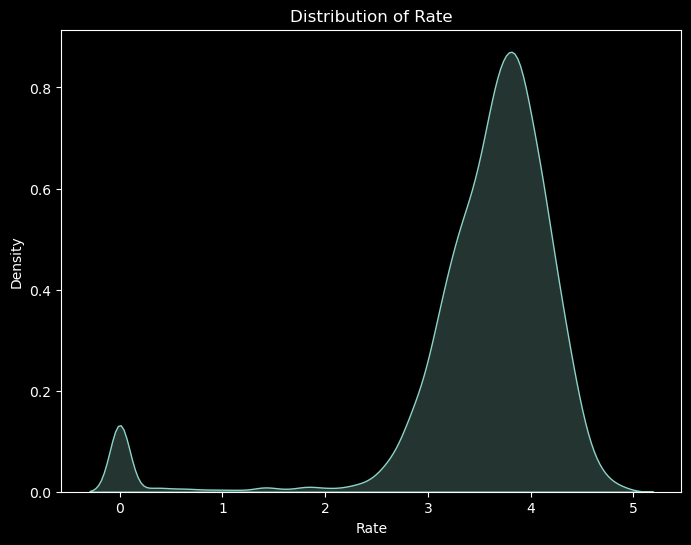

In [37]:
plt.figure(figsize=(8, 6))
sb.kdeplot(df["rate"], shade=True)
plt.xlabel("Rate")
plt.ylabel("Density")
plt.title("Distribution of Rate")
plt.show()

In [ ]:
#new_df["rate"] = pd.to_numeric(new_df["rate"], errors='coerce')

#### treating approx_cost(for two people) column

In [38]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [39]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(lambda x: float(x.replace(",","") if isinstance(x,str) else x))
df["approx_cost(for two people)"]

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51709     800.0
51711     800.0
51712    1500.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 43942, dtype: float64

In [40]:
df["approx_cost(for two people)"].isnull().sum()

252

In [41]:
average_costs = df.groupby("name")["approx_cost(for two people)"].transform('mean')
df["approx_cost(for two people)"].fillna(average_costs, inplace=True)

In [42]:
df["approx_cost(for two people)"].isnull().sum()

100

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          43942 non-null  object 
 1   address                      43942 non-null  object 
 2   name                         43942 non-null  object 
 3   online_order                 43942 non-null  object 
 4   book_table                   43942 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        43942 non-null  int64  
 7   phone                        43110 non-null  object 
 8   location                     43942 non-null  object 
 9   rest_type                    43791 non-null  object 
 10  dish_liked                   23609 non-null  object 
 11  cuisines                     43931 non-null  object 
 12  approx_cost(for two people)  43842 non-null  float64
 13  reviews_list    

In [44]:
k=df[(df["approx_cost(for two people)"].isnull()==True)]
k

url  \
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
3954   https://www.zomato.com/bangalore/north-indian-...   
4852   https://www.zomato.com/bangalore/the-hub-ibis-...   
4952   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
49667  https://www.zomato.com/bangalore/gabbar-chai-s...   
49877  https://www.zomato.com/bangalore/the-hub-ibis-...   
50074  https://www.zomato.com/bangalore/the-hub-ibis-...   
50094  https://www.zomato.com/bangalore/the-hub-ibis-...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   

                                                 address  \
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
3954   2610, 27th Main, Near NIFT, HSR Layout, HSR, B...   
4852   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
4952   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
49667                           Sarjapur Road, Bangalore   
49877  Ibis Bengaluru, Opposite RMZ Ecospace Business...   
50074  Ibis Bengaluru, Opposite RMZ Ecospace Business...   
50094  Ibis Bengaluru, Opposite RMZ Ecospace Business...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   

                              name online_order book_table  rate  votes phone  \
3069   Super Chefs New Royal treat           No         No   0.0      0   NaN   
3774       The Hub  Ibis Bengaluru           No         No   3.9    237   NaN   
3954          North Indian Kitchen           No         No   3.2     13   NaN   
4852       The Hub  Ibis Bengaluru           No         No   3.9    237   NaN   
4952       The Hub  Ibis Bengaluru           No         No   3.9    237   NaN   
...                            ...          ...        ...   ...    ...   ...   
49667                  Gabbar Chai           No         No   3.7     74   NaN   
49877      The Hub  Ibis Bengaluru           No         No   3.9    237   NaN   
50074      The Hub  Ibis Bengaluru           No         No   3.9    237   NaN   
50094      The Hub  Ibis Bengaluru           No         No   3.9    237   NaN   
50940                     Cinnabon           No         No   4.0     80   NaN   

                location    rest_type  \
3069   Bannerghatta Road  Quick Bites   
3774        Marathahalli          Bar   
3954                 HSR     Takeaway   
4852        Marathahalli          Bar   
4952        Marathahalli          Bar   
...                  ...          ...   
49667      Sarjapur Road         Cafe   
49877       Marathahalli          Bar   
50074       Marathahalli          Bar   
50094       Marathahalli          Bar   
50940         Whitefield  Quick Bites   

                                              dish_liked  \
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
3954                                                 NaN   
4852   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
4952   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
49667  Vada Pav, Chicken Nuggets, Maggi, Ginger Tea, ...   
49877  Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
50074  Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
50094  Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   

                                  cuisines  approx_cost(for two people)  \
3069   North Indian, Chinese, South Indian                          NaN   
3774                           Finger Food                          NaN   
3954                          North Indian                          NaN   
4852                           Finger Food                          NaN   
4952                           Finger Food       

In [45]:
df.dropna(axis="index",subset=["approx_cost(for two people)"])

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                       San Churro Cafee          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712      Best Brews  Four Points by Sheraton Bengaluru           No   
51715  Chime  Sheraton Grand Bengaluru Whitefield Hotel            No   
51716                        The Nest  The Den Bengaluru           No   

      book_table  rate  votes                             phone  \
0            Yes   4.1    775    080 42297555\r\n+91 9743772233   
1             No   4.1    787                      080 41714161   
2             No   3.8    918                    +91 9663487993   
3             No   3.7     88                    +91 9620009302   
4             No   3.8    166  +91 8026612447\r\n+91 9901210005   
...          ...   ...    ...                               ...   
51709         No   3.7     34    +91 9980121279\n+91 9900240646   
51711         No   2.5     81                      080 65951222   
51712         No   3.6     27                      080 40301477   
51715        Yes   4.3    236                      080 49652769   
51716         No   3.4     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51709                  Whitefield   Casual Dining, Bar   
51711                  Whitefield   Casual Dining, Bar   
51712                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Cho

#### restaurants delivering online or not

In [46]:
x1=df["online_order"].value_counts()
x1

Yes    28308
No     15634
Name: online_order, dtype: int64

In [47]:
fig = px.pie(df, values=x1, names=x1.index,title='Pie chart' ,template = 'plotly_dark')
fig.show()

#### restaurants allowing table booking or not

In [292]:
k=df["book_table"].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

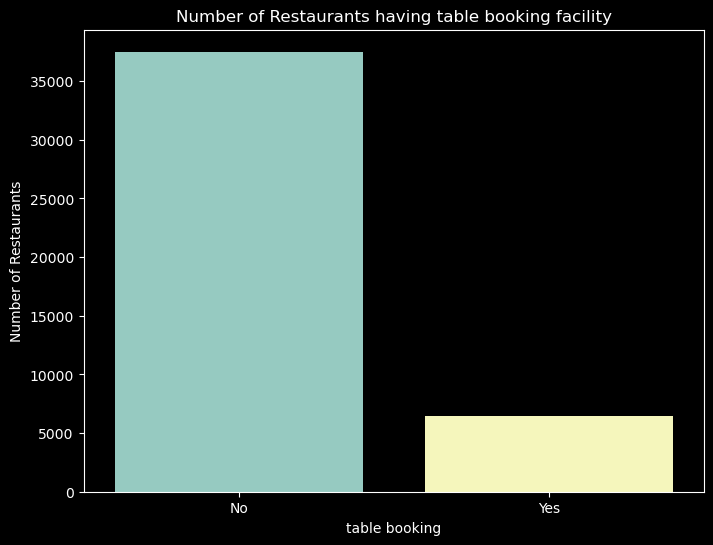

In [312]:
booking_table_counts = df["book_table"].value_counts().reset_index()##if not given yes/no value will be the index
booking_table_counts.columns = ["booking_table", "Count"]

plt.figure(figsize=(8, 6))
sb.barplot(x="booking_table", y="Count", data=booking_table_counts)
plt.xlabel("table booking")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants having table booking facility")
plt.show()

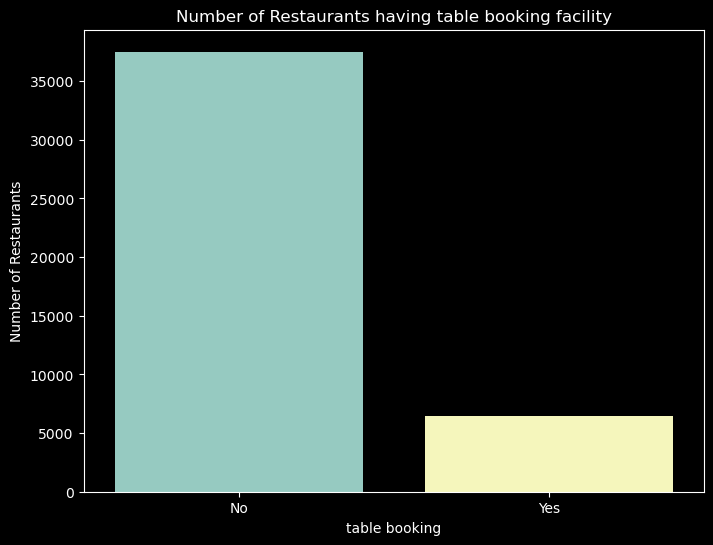

In [313]:
booking_table_counts = df["book_table"].value_counts()##no index reset.so yes/no will be the index now.
#online_order_counts.columns = ["Online Order", "Count"]

plt.figure(figsize=(8, 6))
sb.barplot(x=booking_table_counts.index, y=booking_table_counts )
plt.xlabel("table booking")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants having table booking facility")
plt.show()

In [48]:
x2=booking_table_counts = df["book_table"].value_counts()
fig = px.pie(df, values=x2, names=x2.index,title='Pie chart' ,template="plotly_dark")
fig.show()

#### table booking rate vs rate

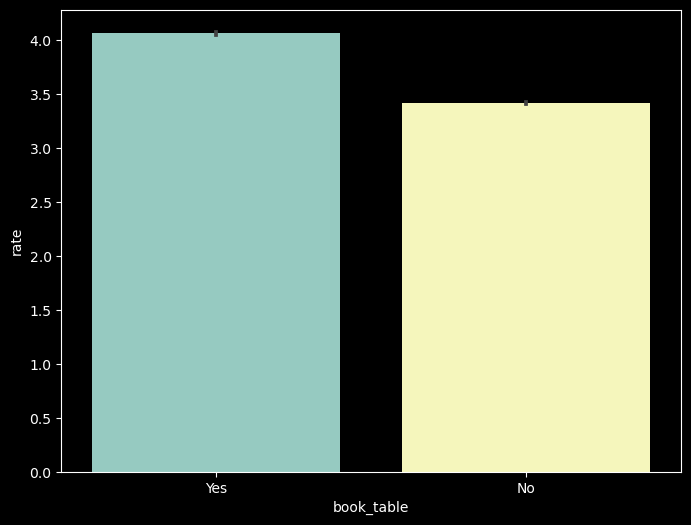

In [340]:
plt.figure(figsize=(8, 6))
sb.barplot(x=df["book_table"],y=df["rate"] )
#plt.xlabel("Online Order")
#plt.ylabel("Number of Restaurants")
#plt.title("Number of Restaurants Delivering Online Orders")
plt.show()

In [537]:
df["rate"].dtype

dtype('float64')

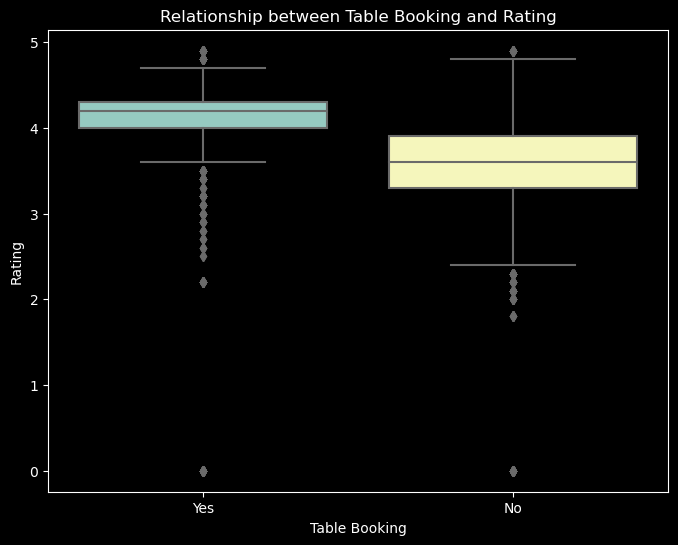

In [342]:
plt.figure(figsize=(8, 6))
sb.boxplot(x="book_table", y="rate", data=df)
plt.xlabel("Table Booking")
plt.ylabel("Rating")
plt.title("Relationship between Table Booking and Rating")
plt.show()

In [ ]:
# The box plot will display the distribution of ratings for restaurants with and without table booking. 
# It will provide insights into any differences in ratings between the two categories. 
# The median, quartiles, and potential outliers can be observed from the plot, helping to identify any patterns or trends.

#### best location

In [538]:
df.groupby("location")["rate"].mean().sort_values(ascending=False)

location
Lavelle Road             4.042886
St. Marks Road           4.017201
Koramangala 3rd Block    3.978756
Church Street            3.976327
Sankey Road              3.965385
                           ...   
Ejipura                  3.062973
Bommanahalli             2.948662
Hebbal                   2.880000
North Bangalore          2.642857
West Bangalore           2.020000
Name: rate, Length: 92, dtype: float64

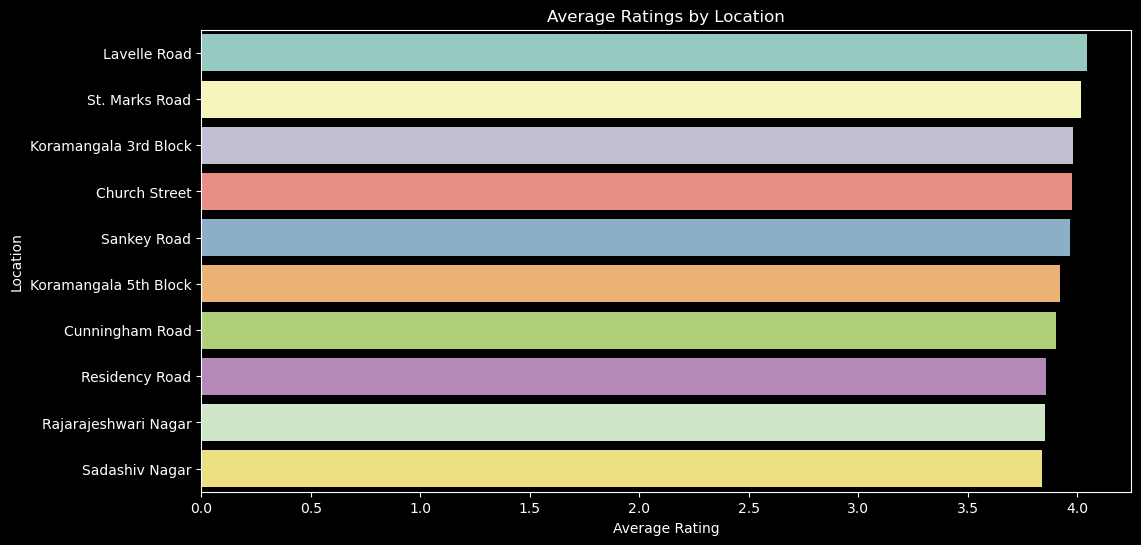

In [539]:
location_ratings = df.groupby("location")["rate"].mean().reset_index().sort_values(by="rate", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sb.barplot(x="rate", y="location", data=location_ratings)
plt.xlabel("Average Rating")
plt.ylabel("Location")
plt.title("Average Ratings by Location")
plt.show()

In [ ]:
#these are the top 10 locations for food in bangalore

#### relationship between location and rating

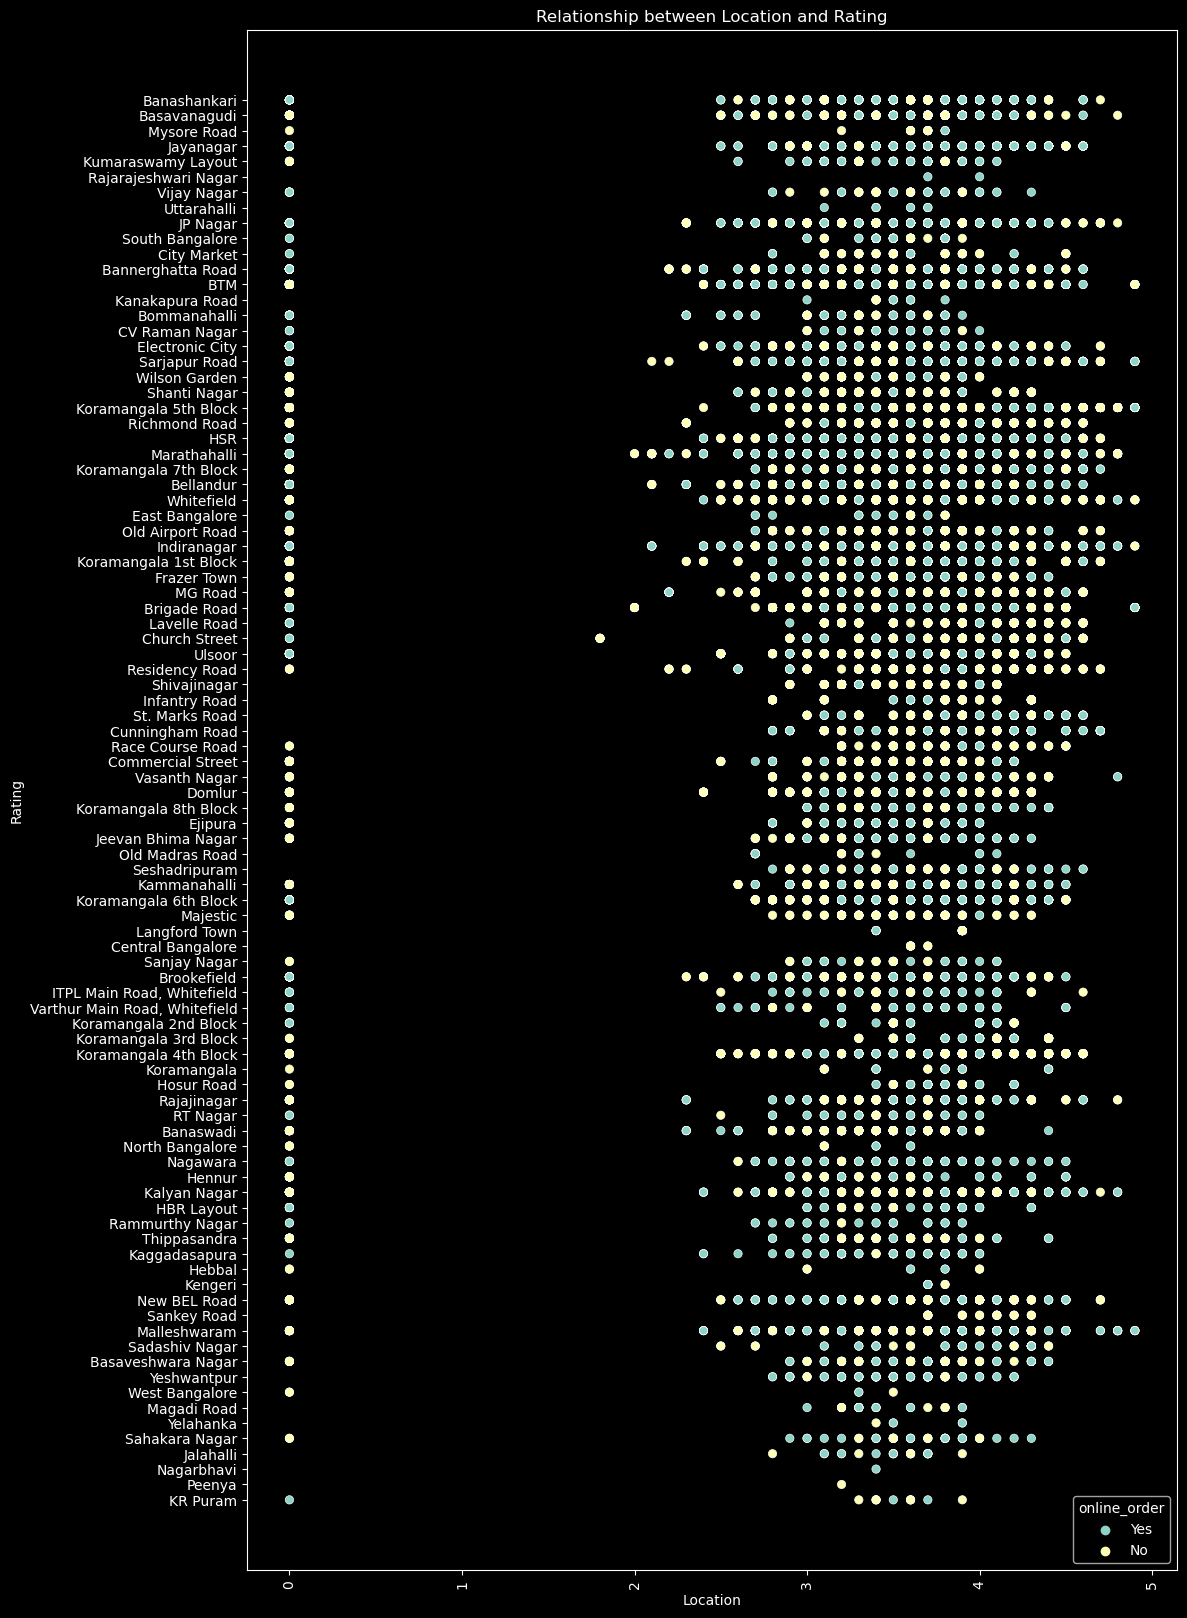

In [371]:
#a=df.groupby("location")["rate"].mean()
plt.figure(figsize=(12, 20))
sb.scatterplot(y="location",x="rate",hue="online_order", data=df)
plt.xlabel("Location")
plt.ylabel("Rating")
plt.title("Relationship between Location and Rating")
plt.xticks(rotation=90)
plt.show()

In [ ]:
## from this we can say almost restaurants in all locations are having rating betwen 3 and 4.
## few locations namely peenya,nagarbhavi,hebbai,langford town,kengeri,central banglore are having very less rating counts.
## we can also observe online order is available in all locations.

#### restaurant type

In [375]:
df["rest_type"].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [376]:
df["rest_type"].nunique()##there are 87 types of restaurants available in banglore

87

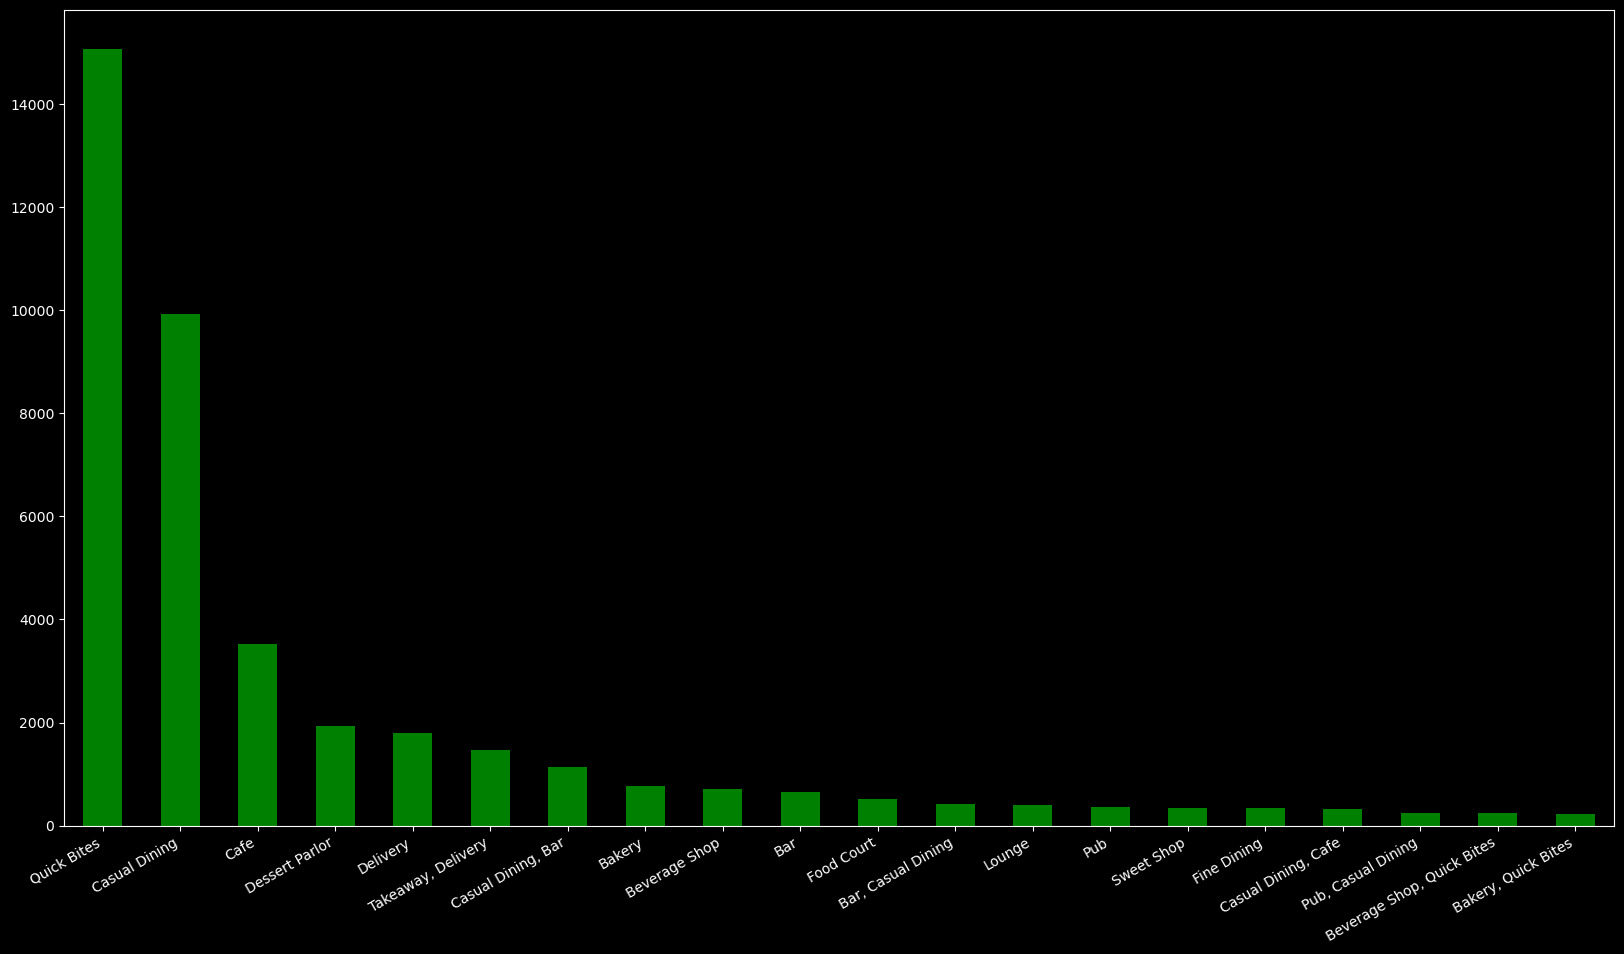

In [381]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='green')
plt.gcf().autofmt_xdate()


In [ ]:
##quick bites type of restaurants is very much popular in bangalore

#### gaussian restaurant type and rating

In [479]:
average_rate = df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)
average_rate

rest_type
Pub, Cafe                     4.657500
Bar, Pub                      4.600000
Microbrewery, Bar             4.446154
Microbrewery, Pub             4.438095
Casual Dining, Irani Cafee    4.406667
                                ...   
Dessert Parlor, Kiosk         3.000000
Quick Bites, Food Court       2.957895
Pub, Bar                      2.767500
Dhaba                         2.320833
Bakery, Beverage Shop         1.600000
Name: rate, Length: 87, dtype: float64

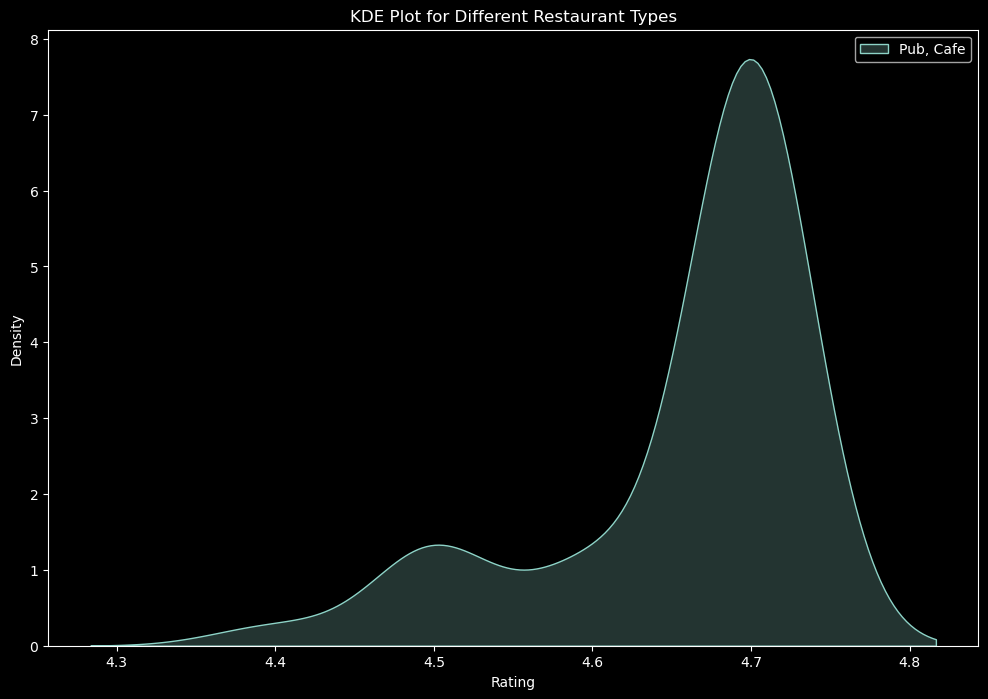

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


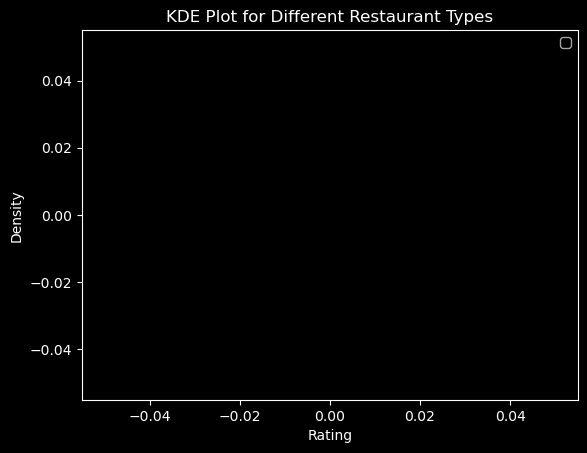

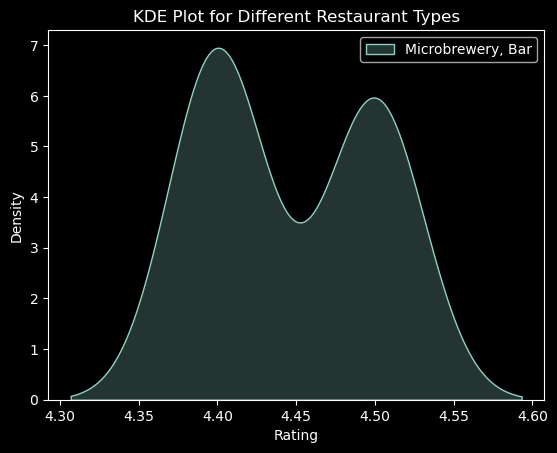

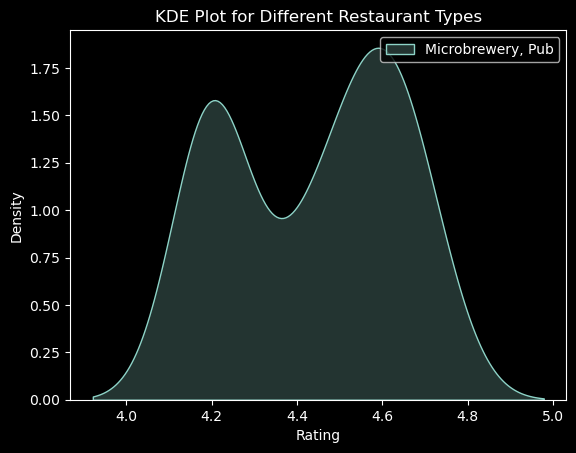

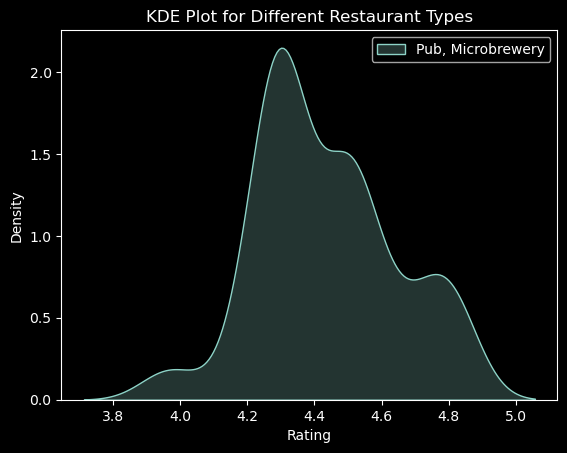

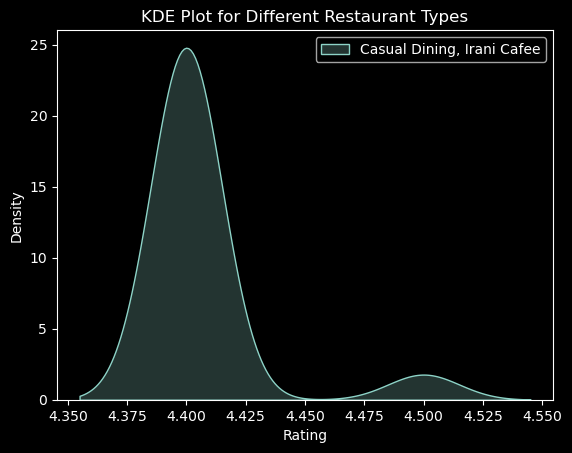

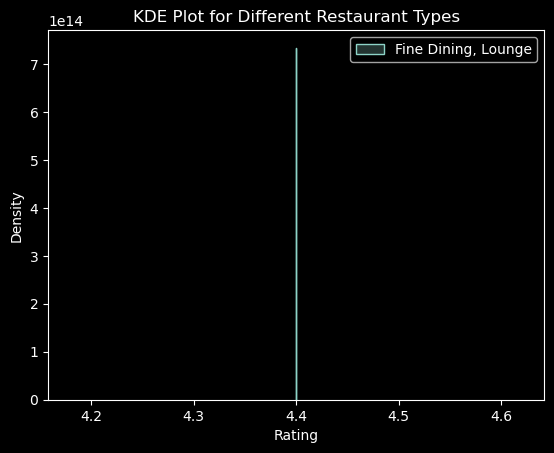

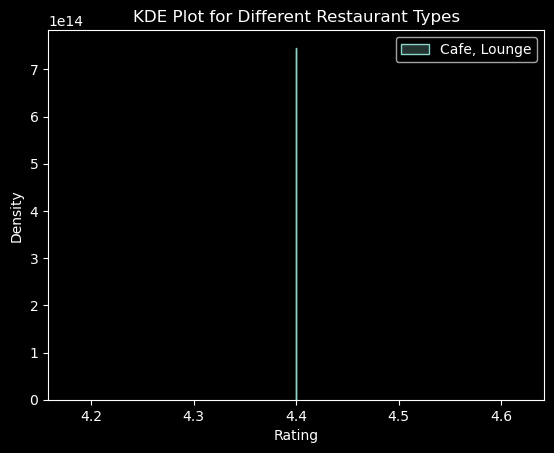

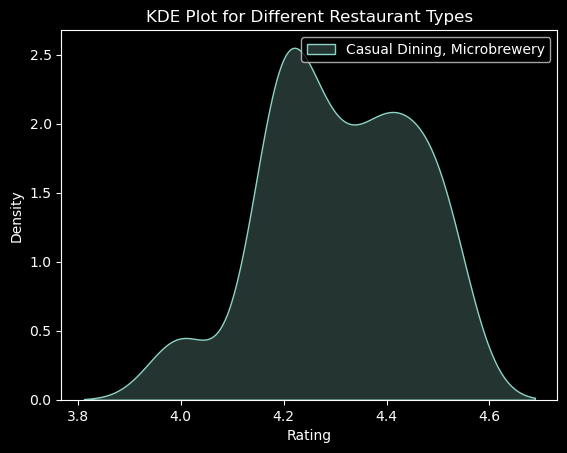

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


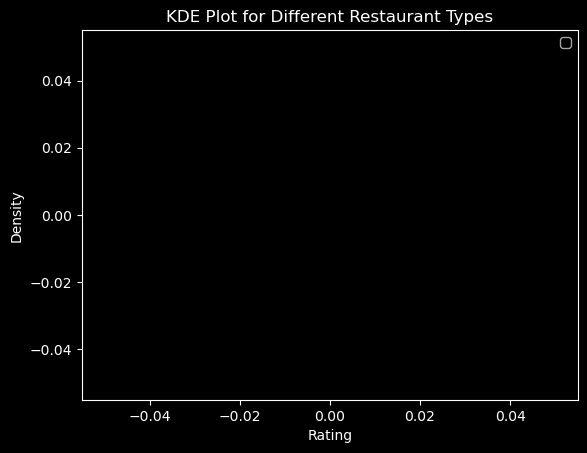

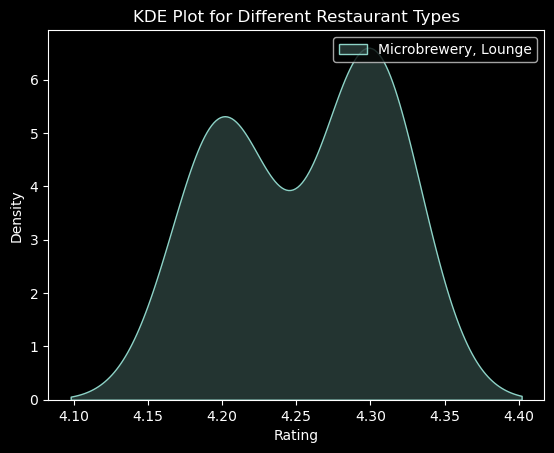

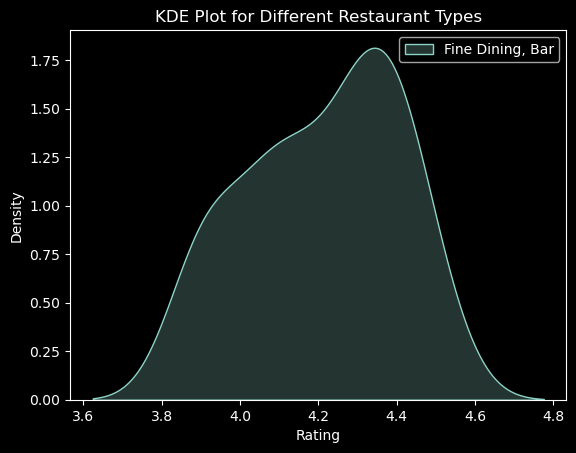

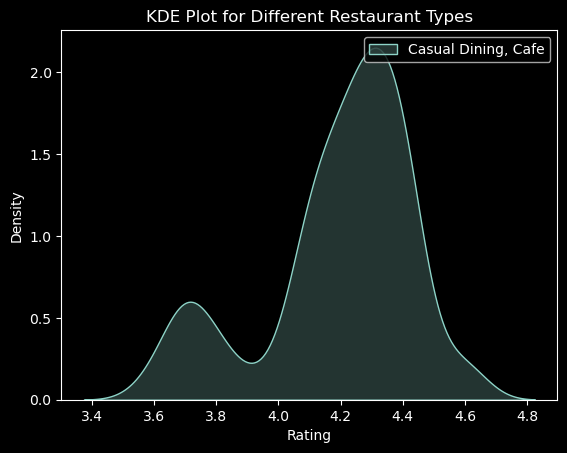

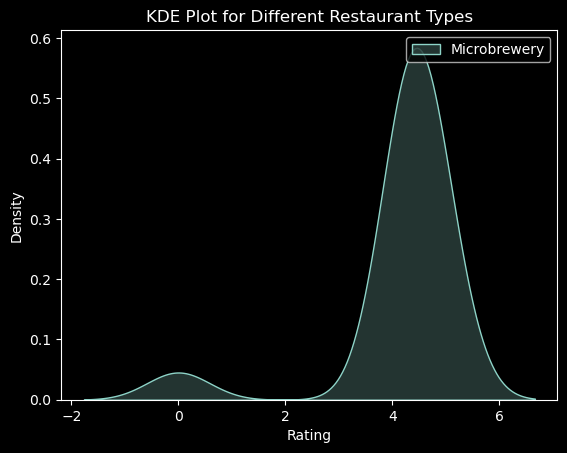

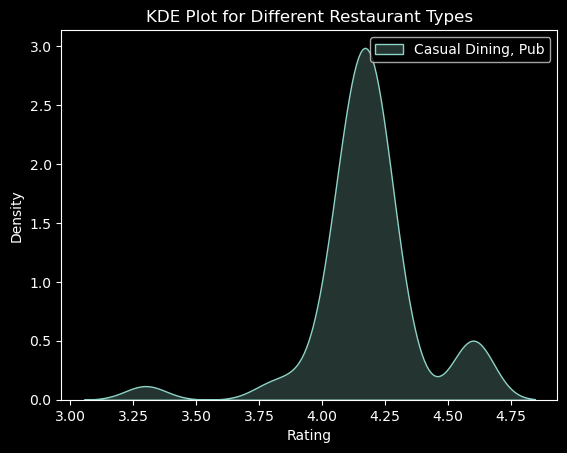

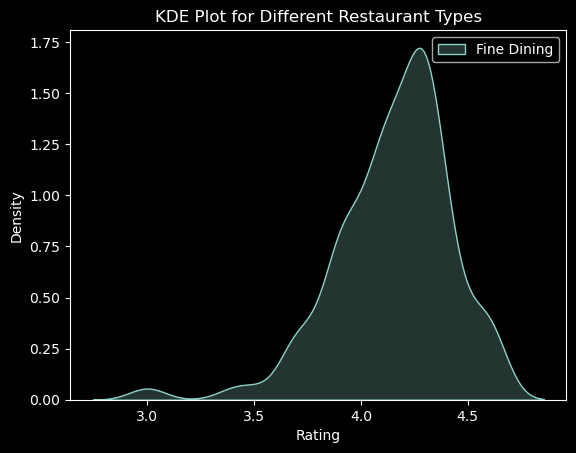

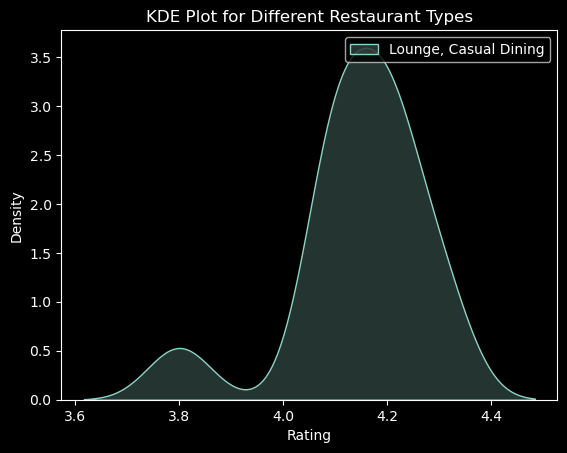

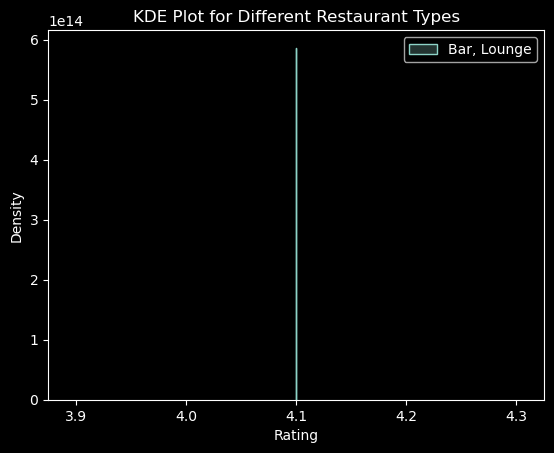

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


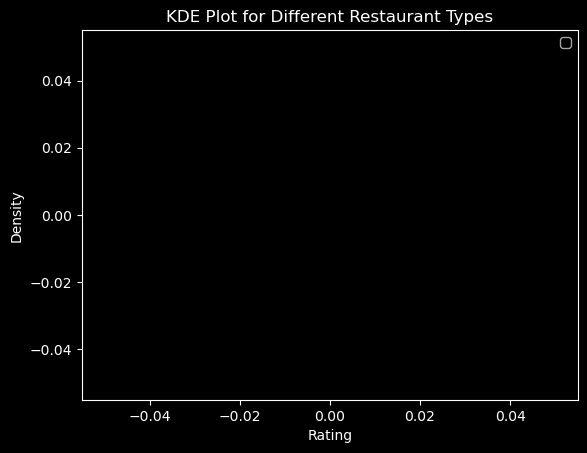

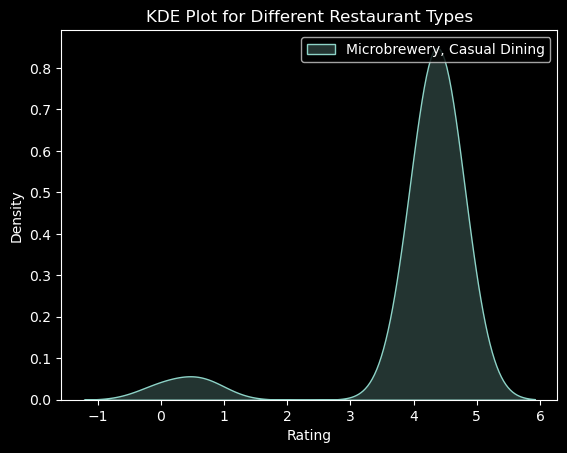

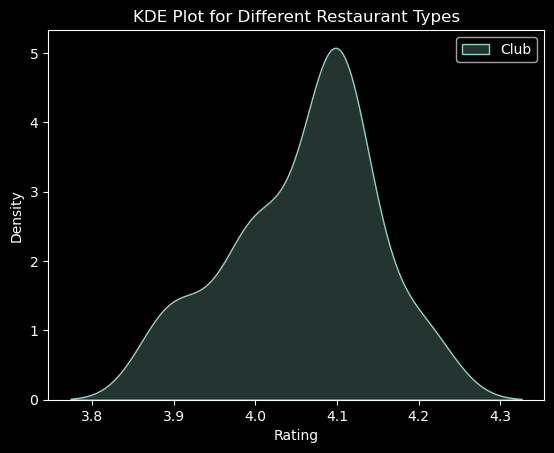

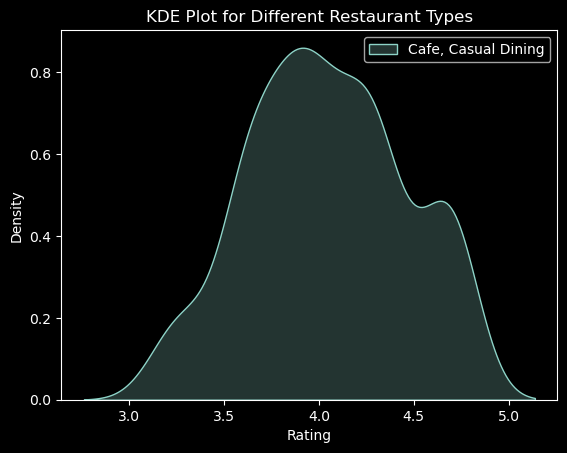

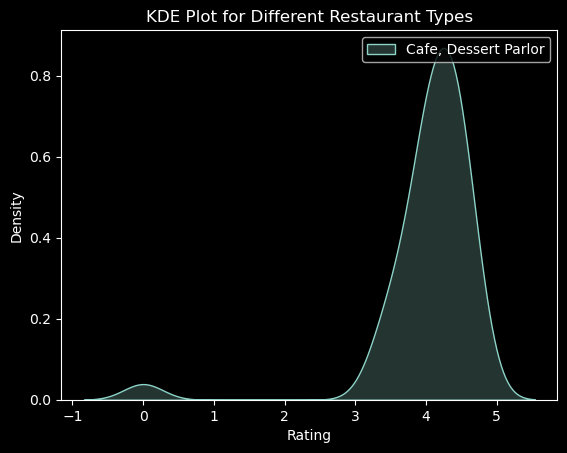

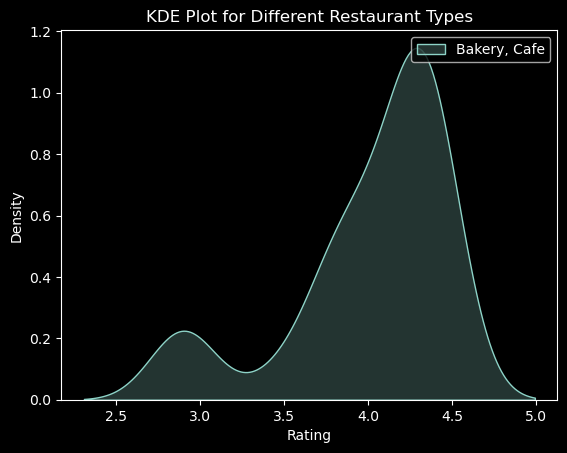

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


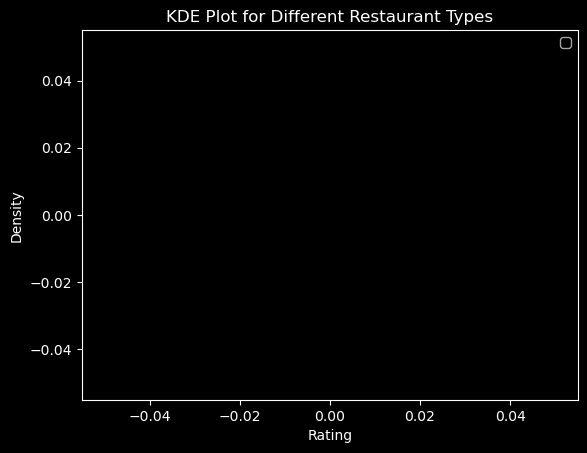

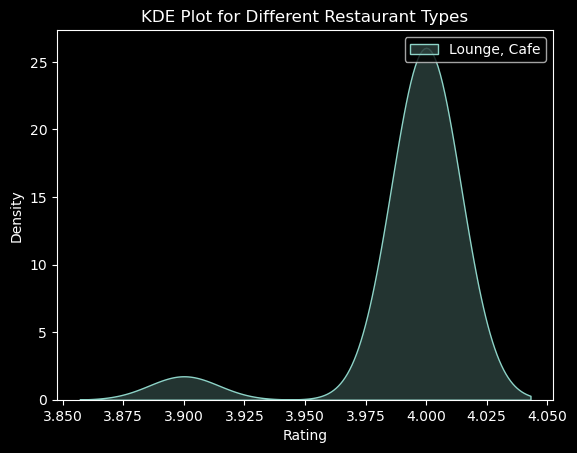

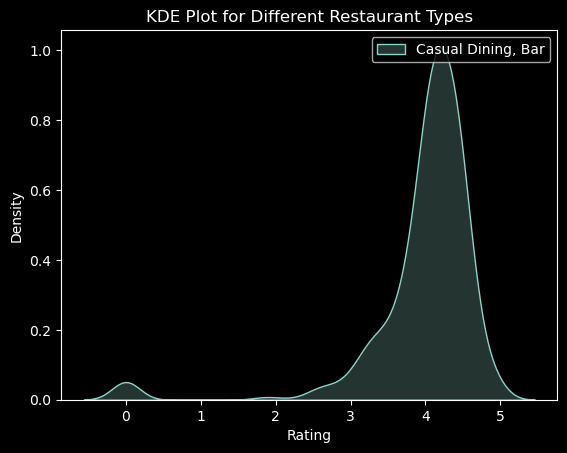

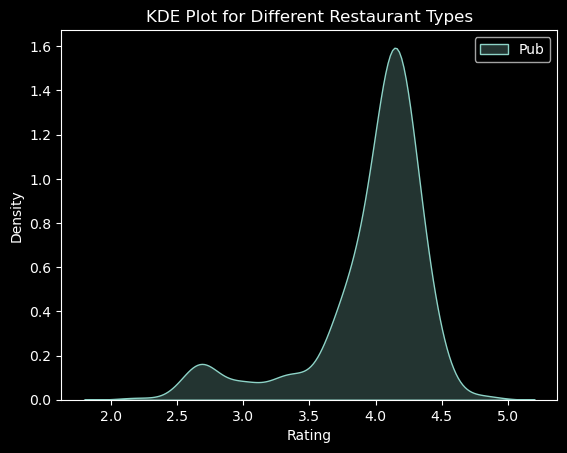

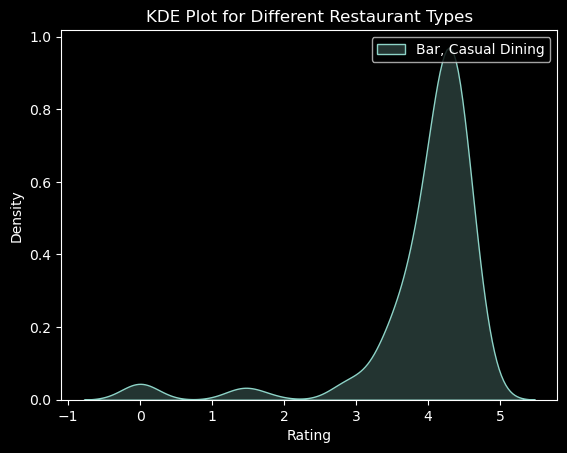

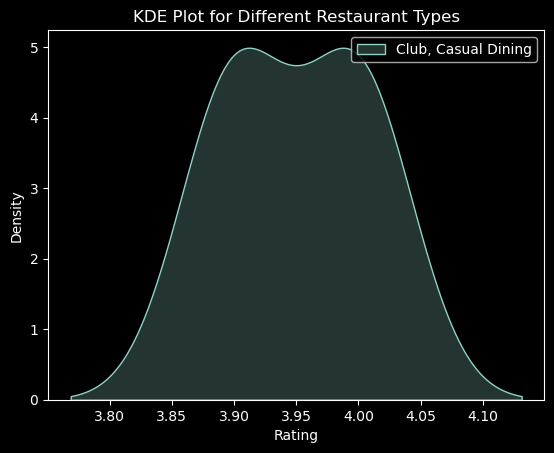

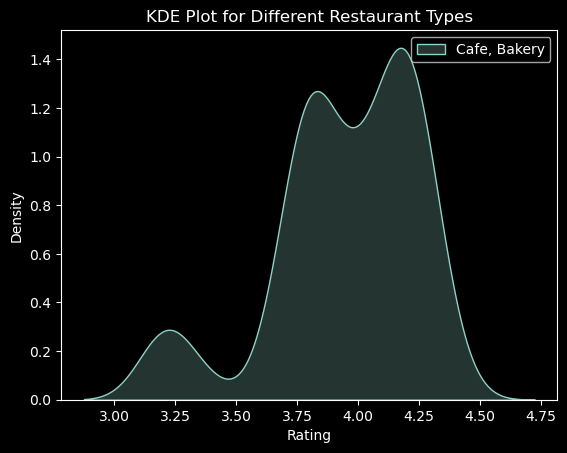

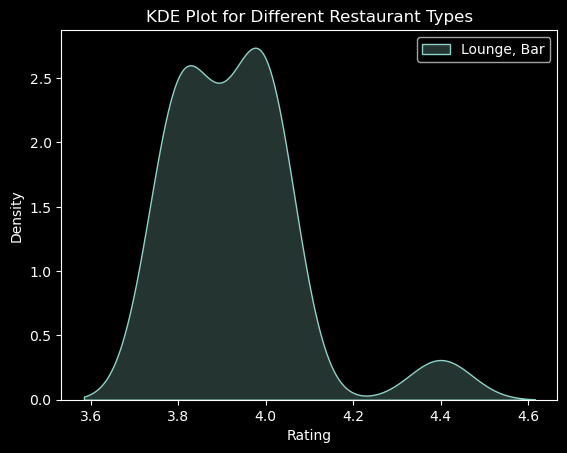

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


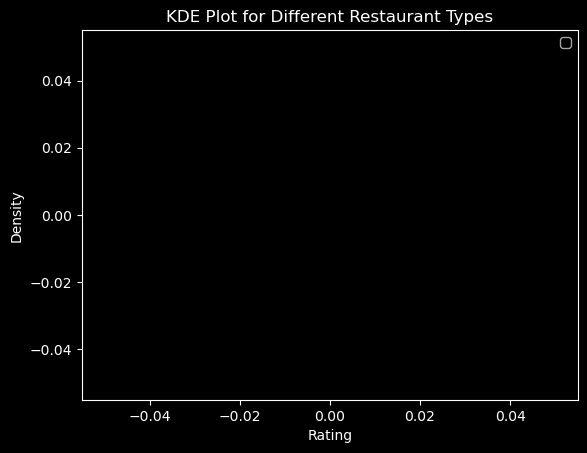

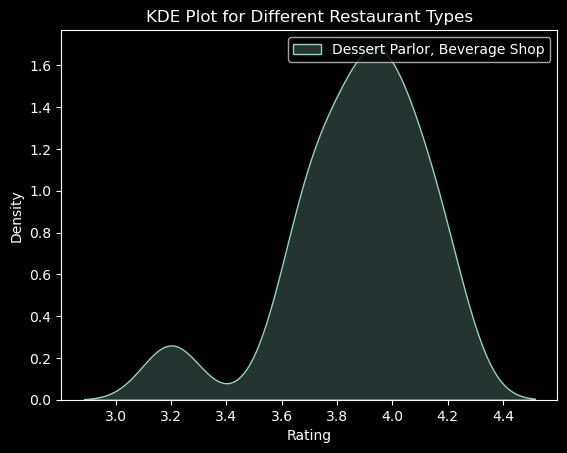

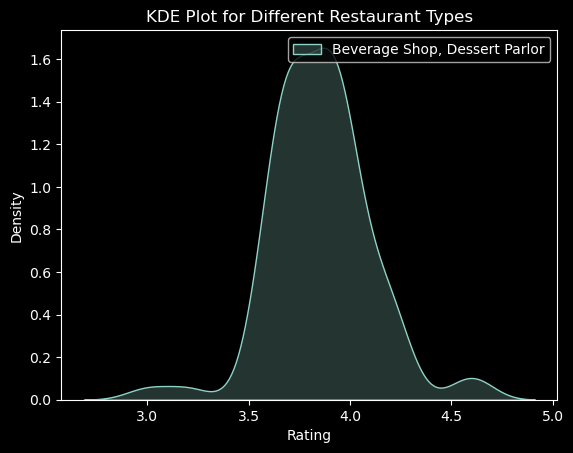

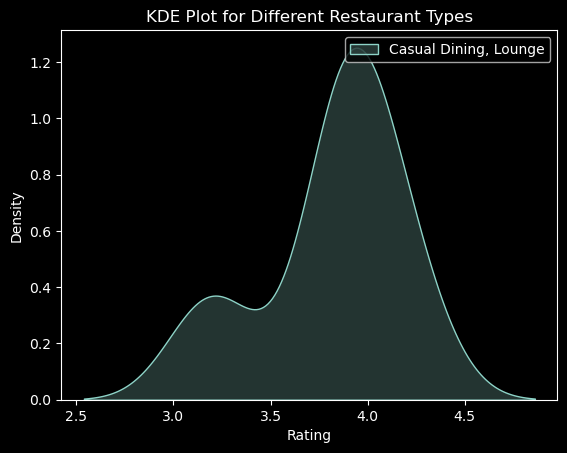

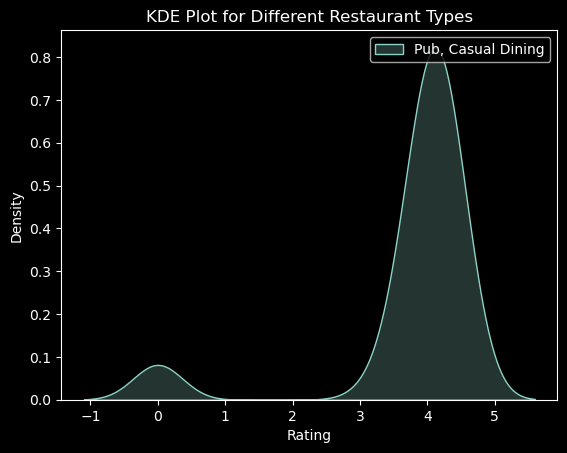

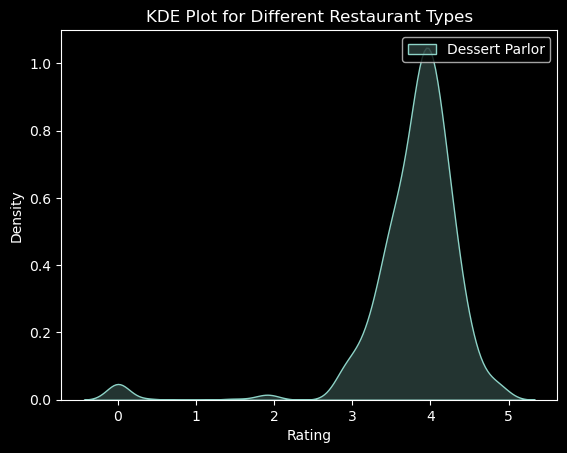

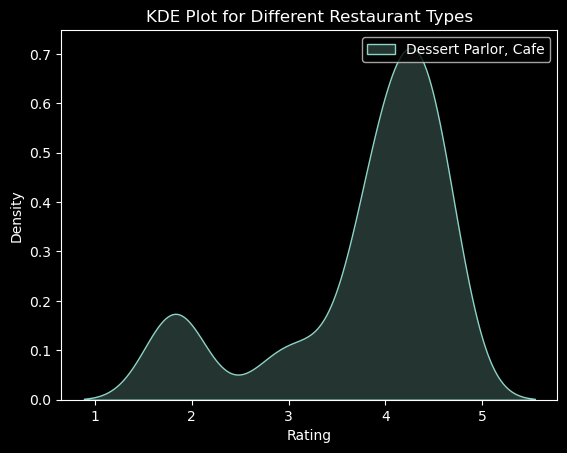

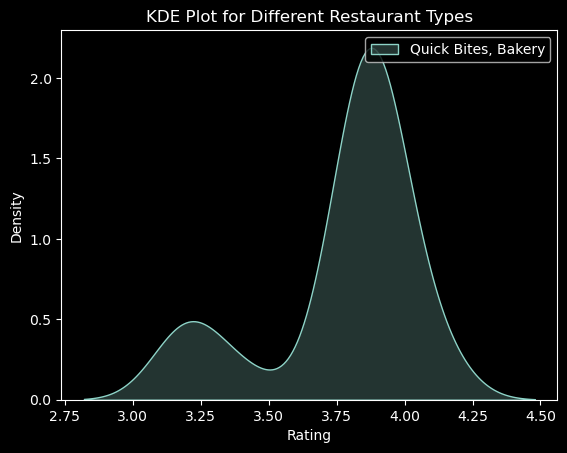

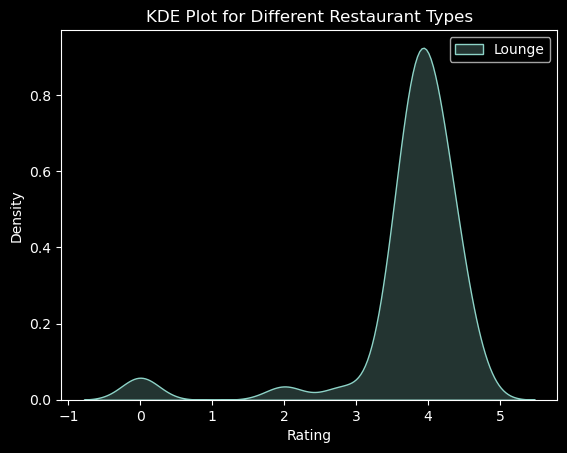

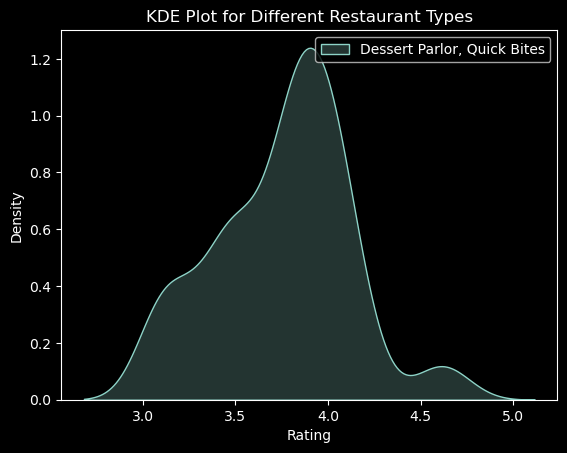

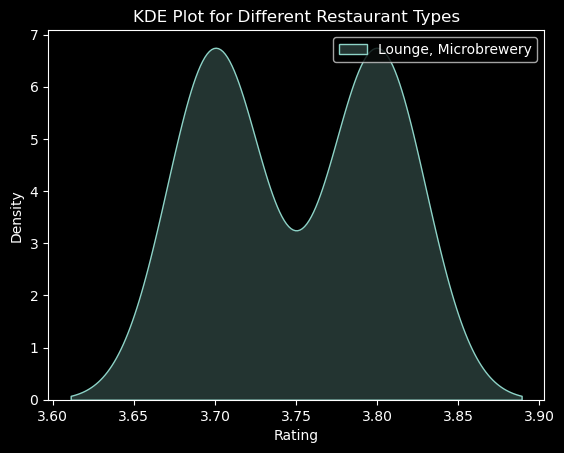

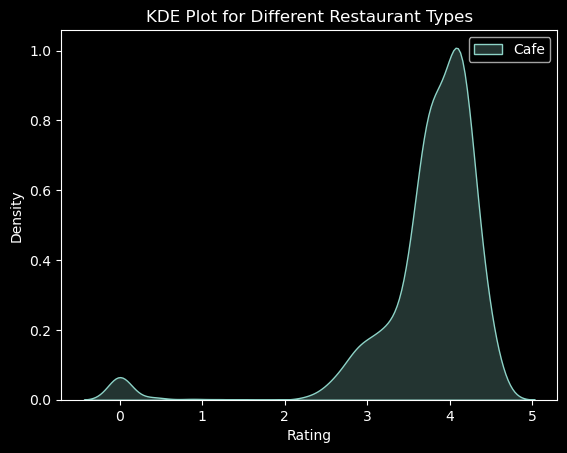

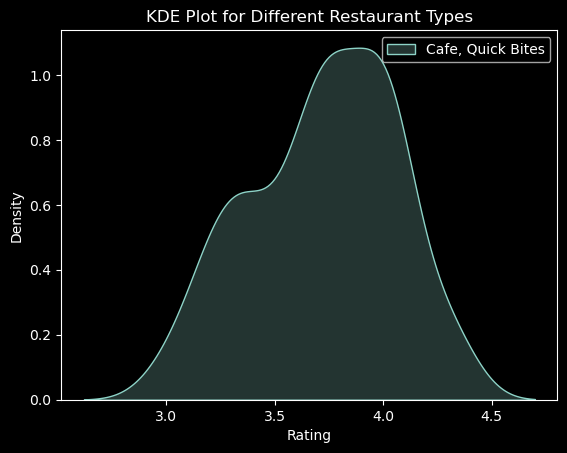

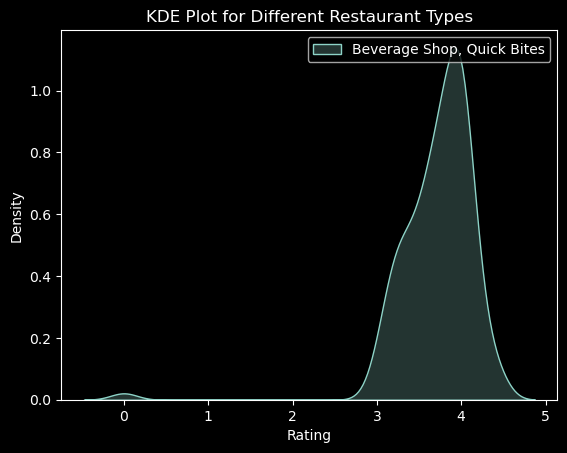

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


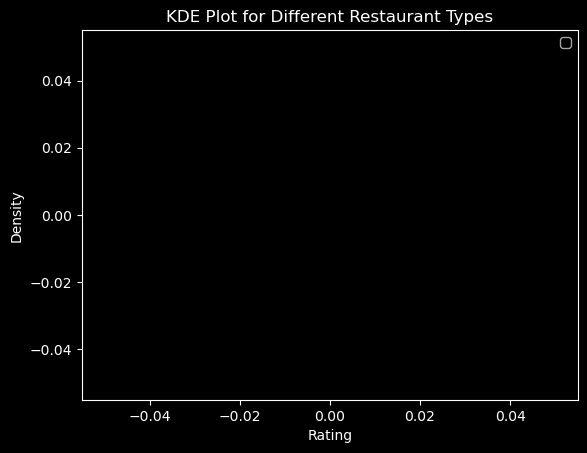

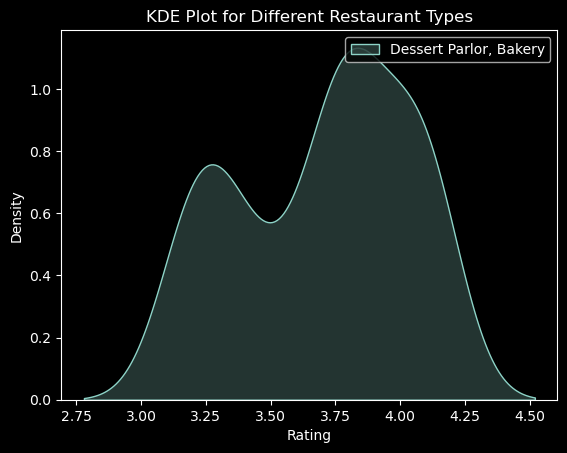

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


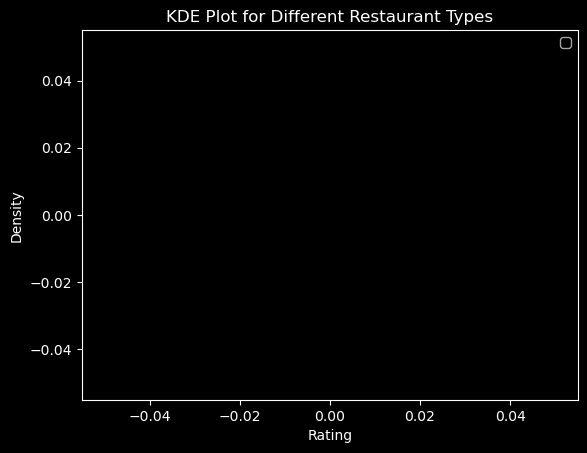

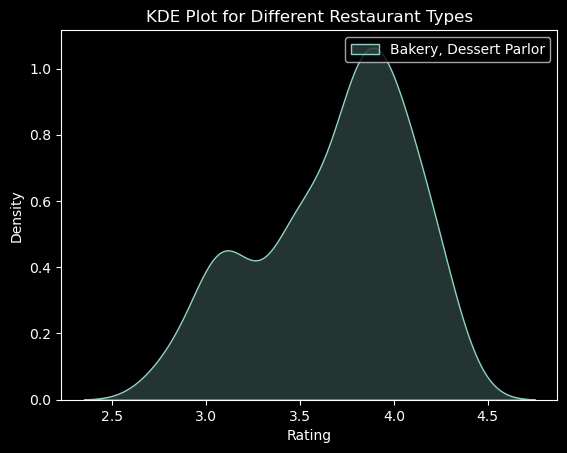

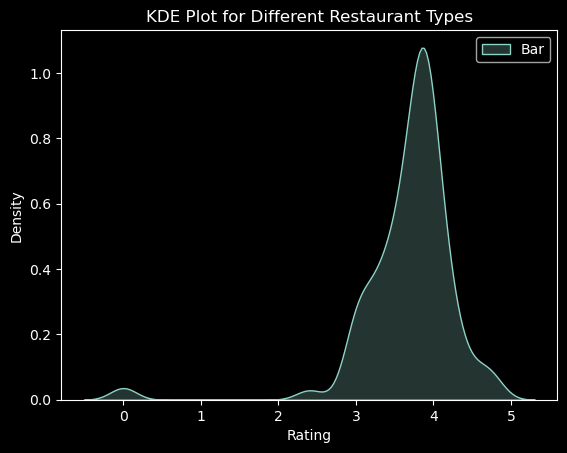

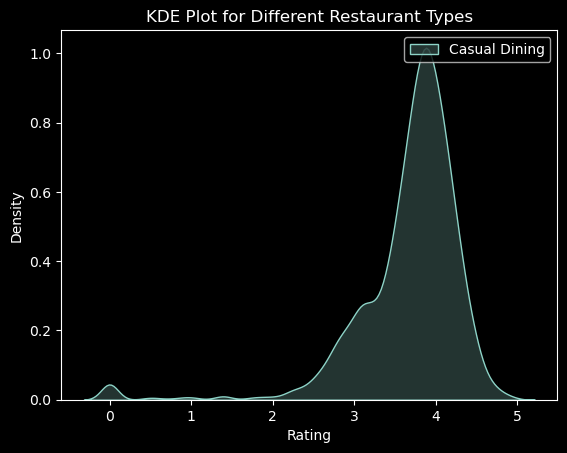

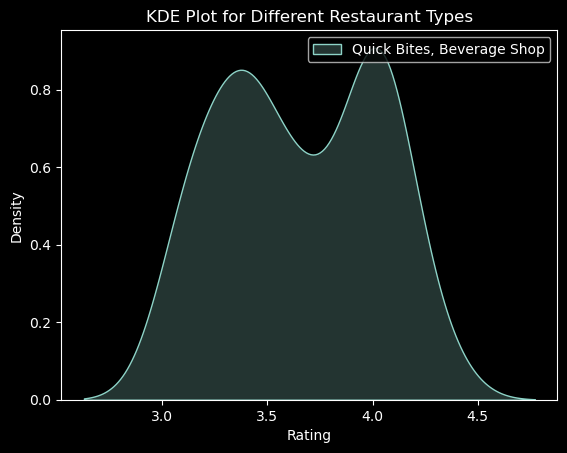

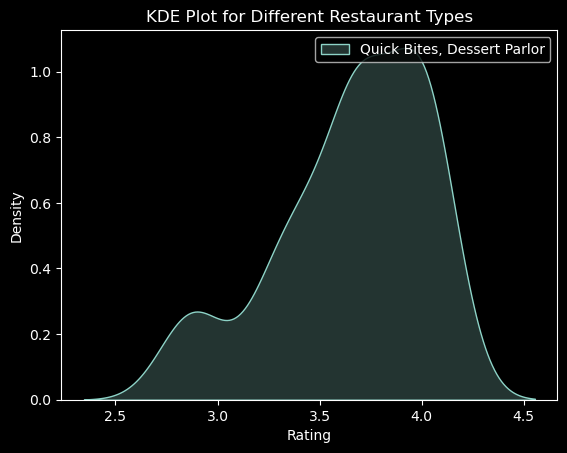

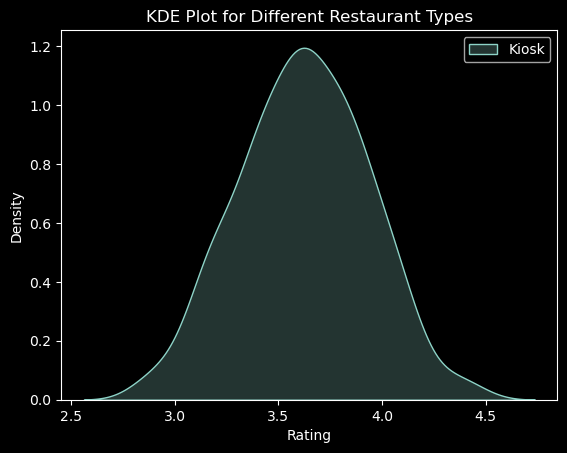

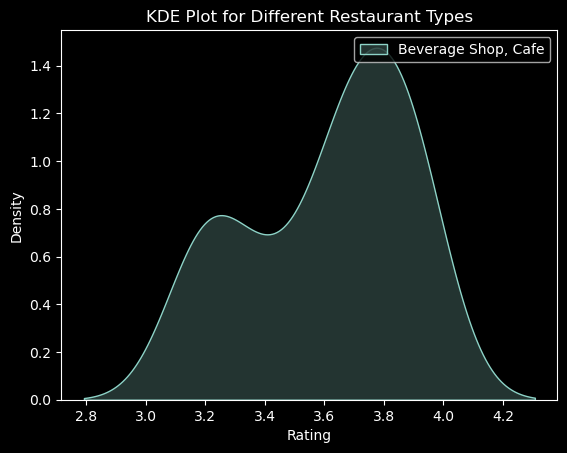

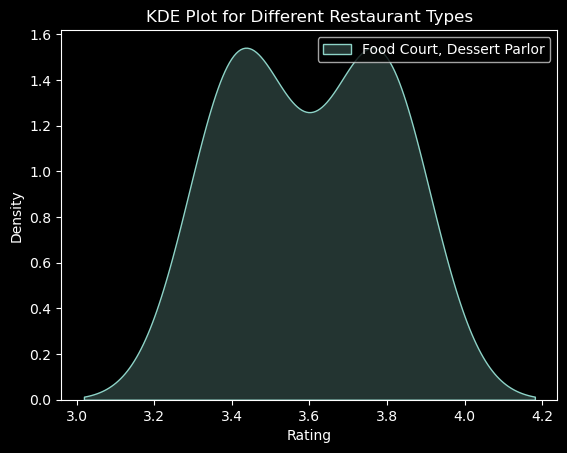

LinAlgError: singular matrix

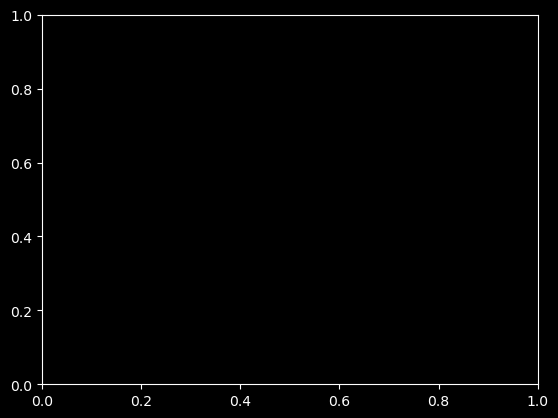

In [96]:
average_rate = df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)
unique_rest_types = average_rate.index

# Create a KDE plot for each unique restaurant type
plt.figure(figsize=(12, 8))
for rest_type in unique_rest_types:
    filtered_data = df[df['rest_type'] == rest_type]
    
    if len(filtered_data) > 1:  # Check if there are sufficient data points
        sb.kdeplot(data=filtered_data, x='rate', fill=True, label=rest_type)
        plt.xlabel('Rating')
        plt.ylabel('Density')
        plt.title('KDE Plot for Different Restaurant Types')
        plt.legend()
        plt.show()
        
        

## you can see dessert parlor and beverage shop are following gaussian distribution

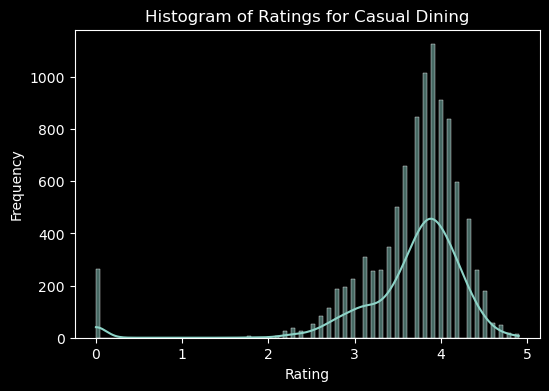

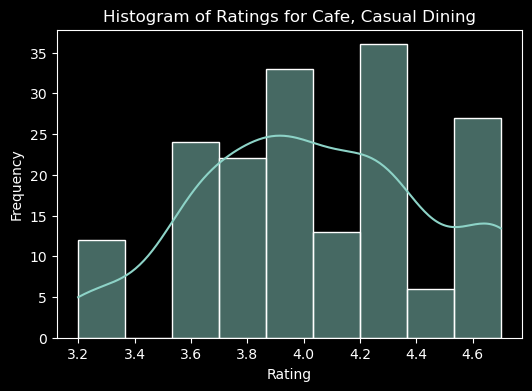

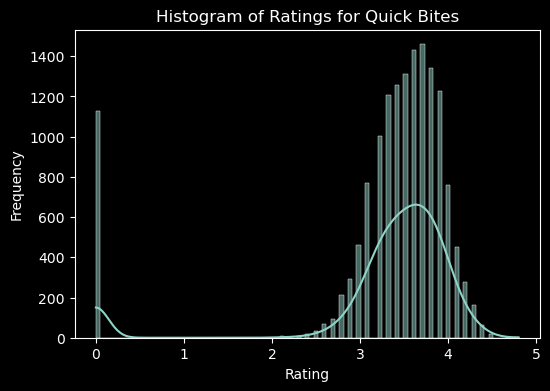

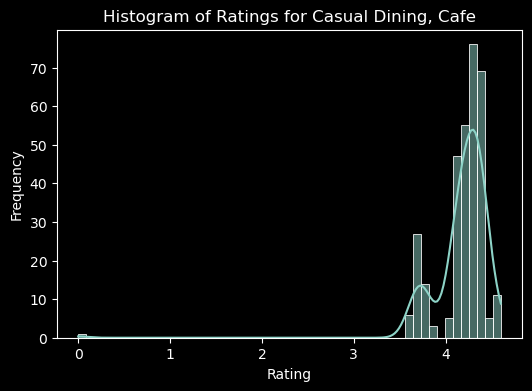

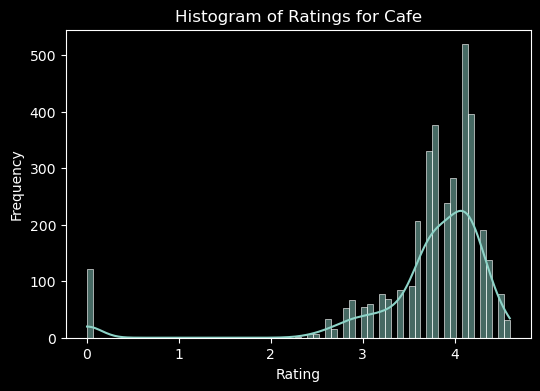

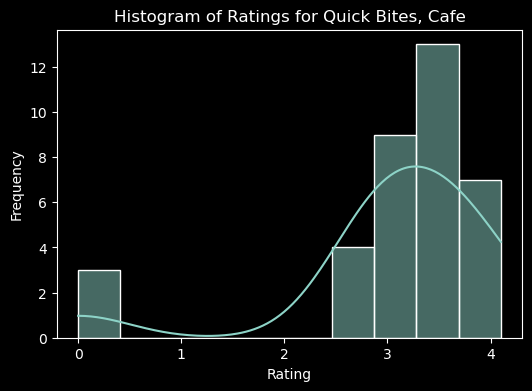

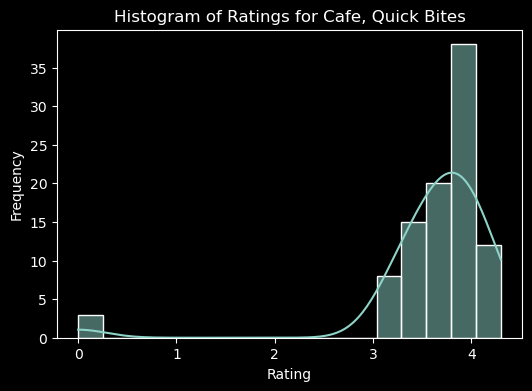

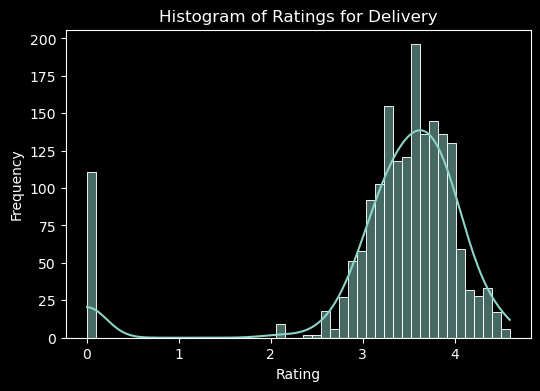

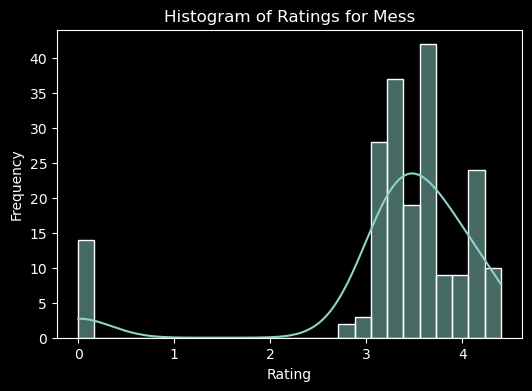

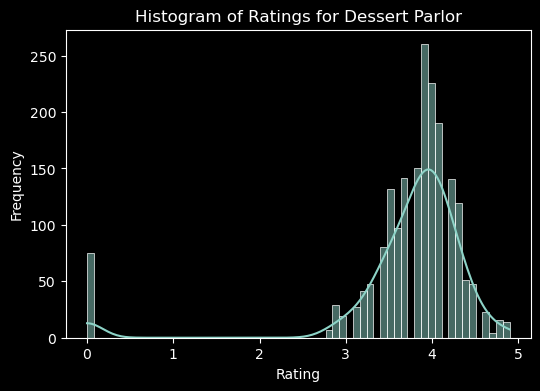

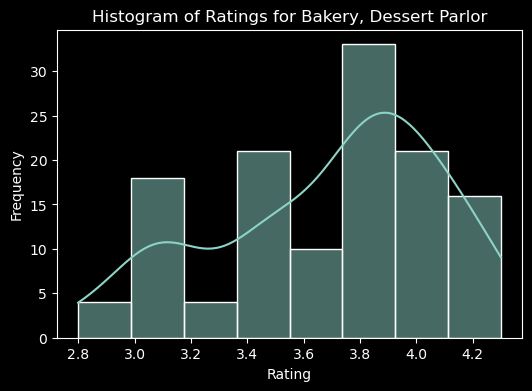

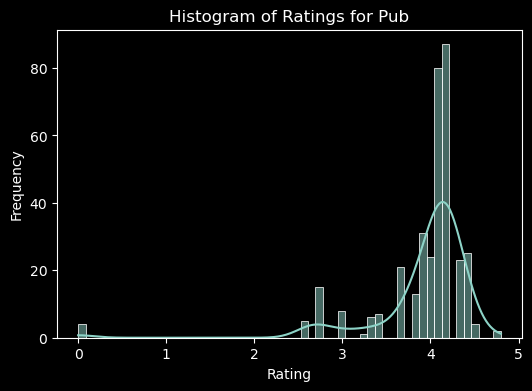

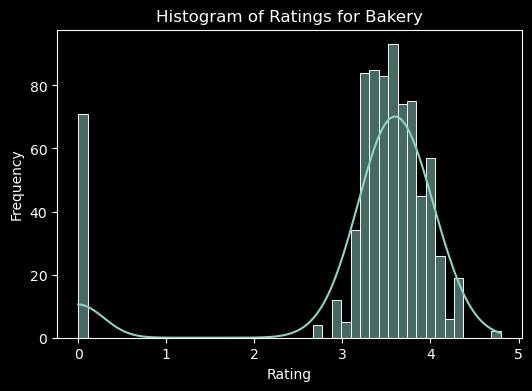

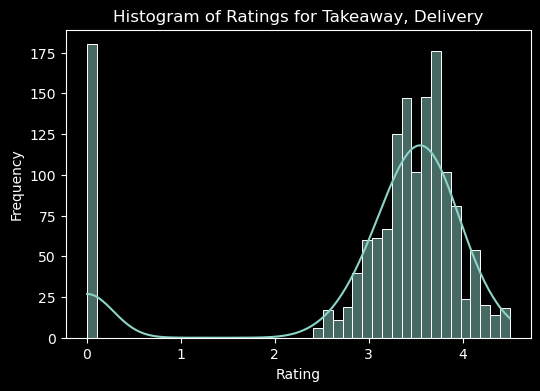

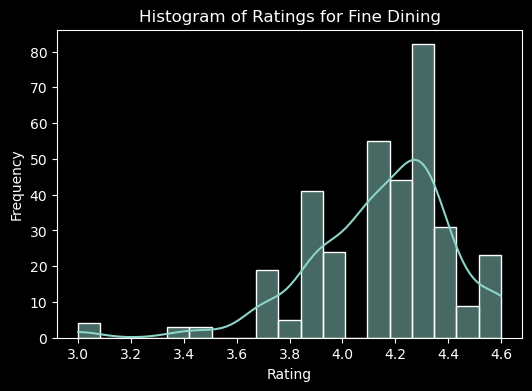

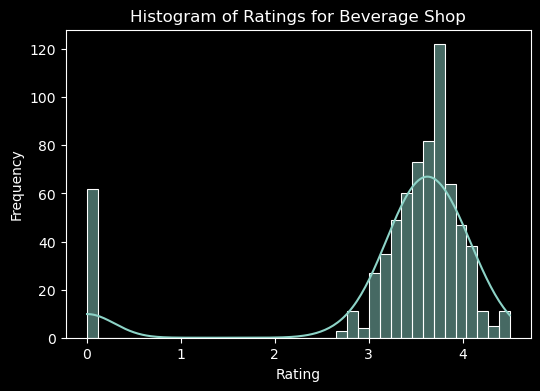

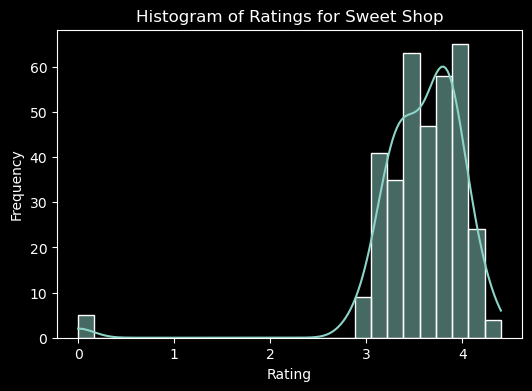

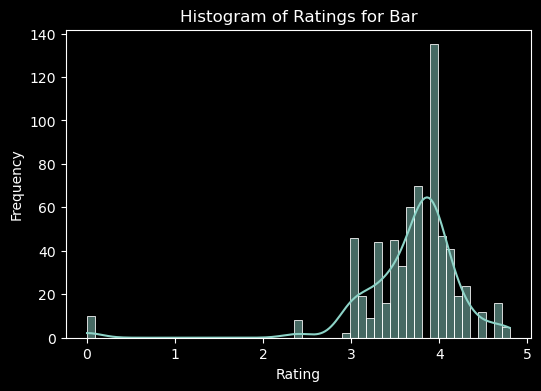

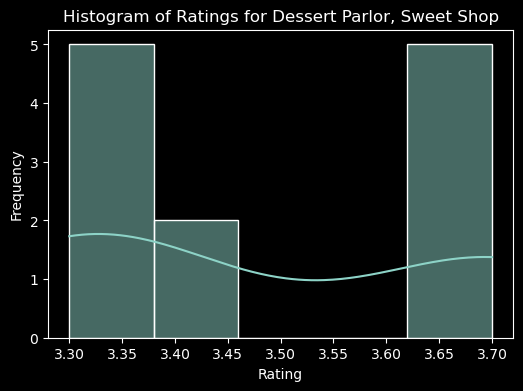

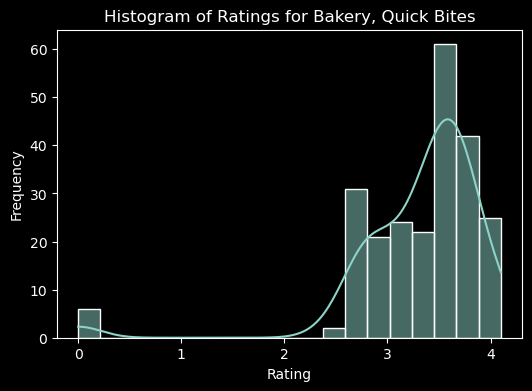

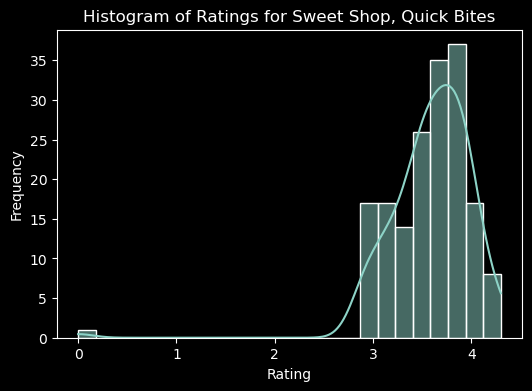

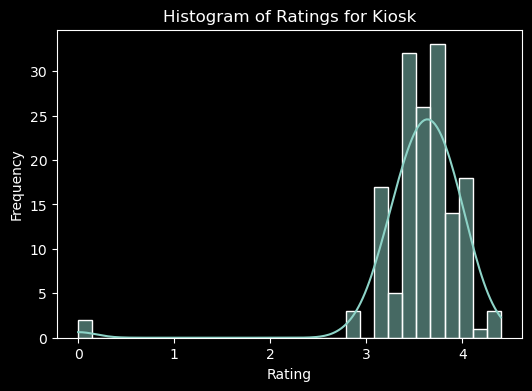

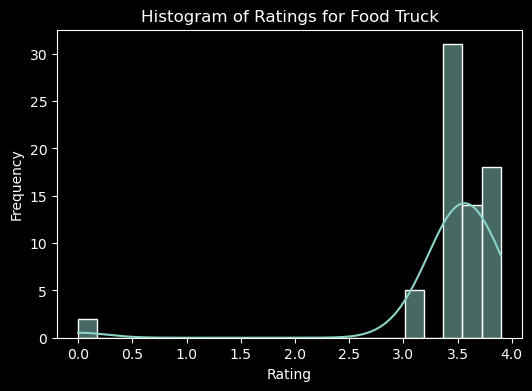

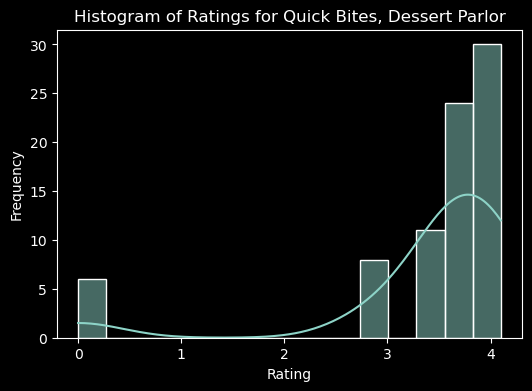

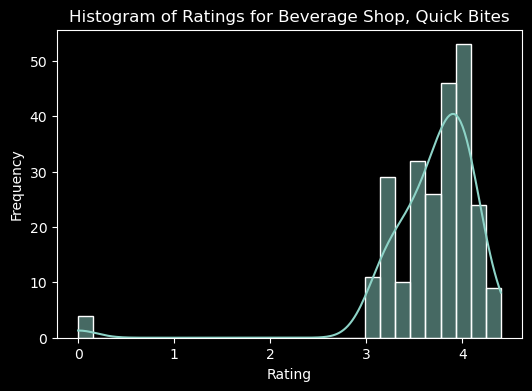

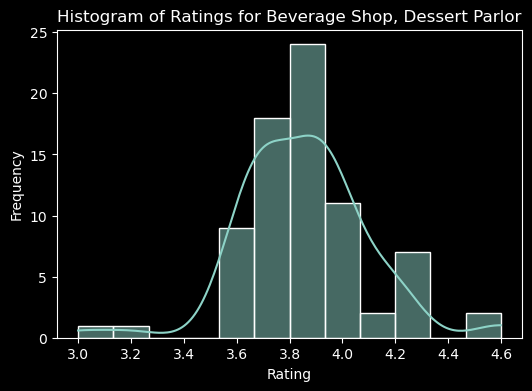

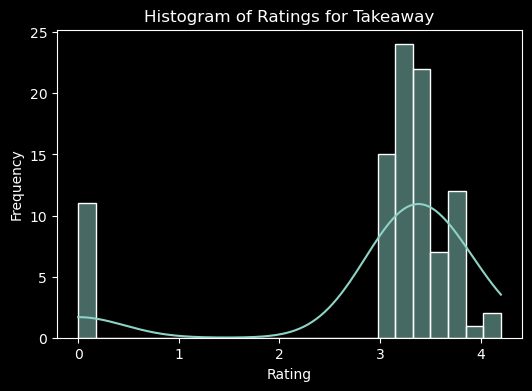

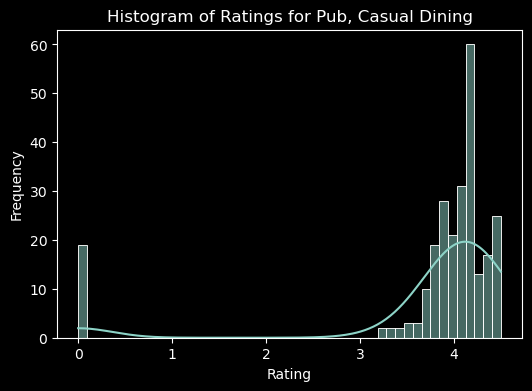

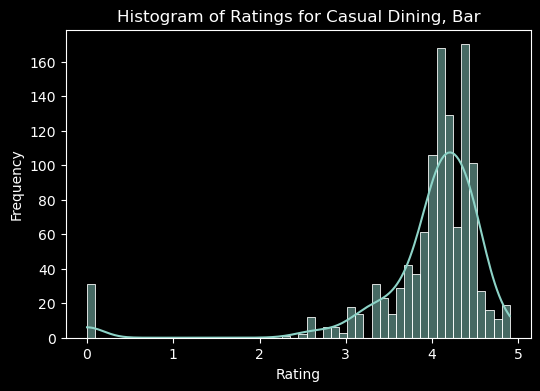

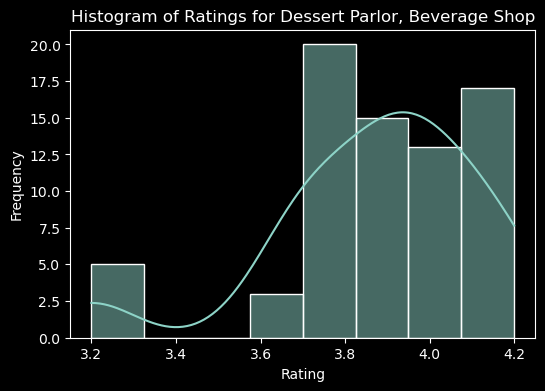

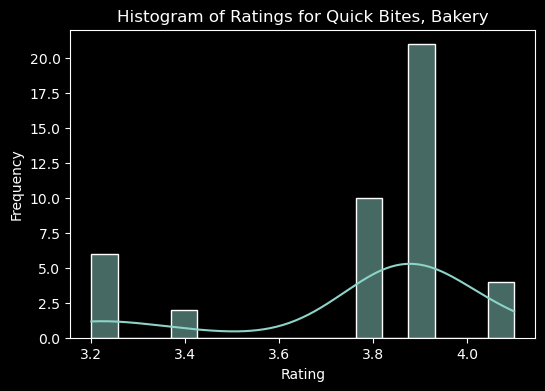

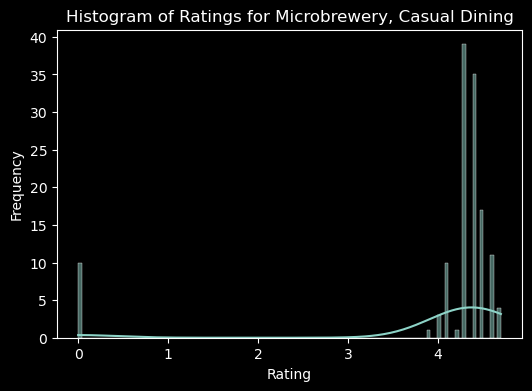

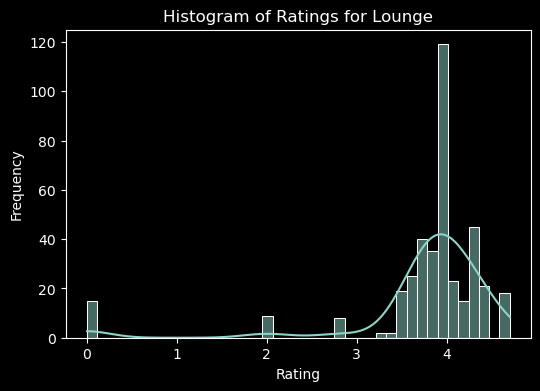

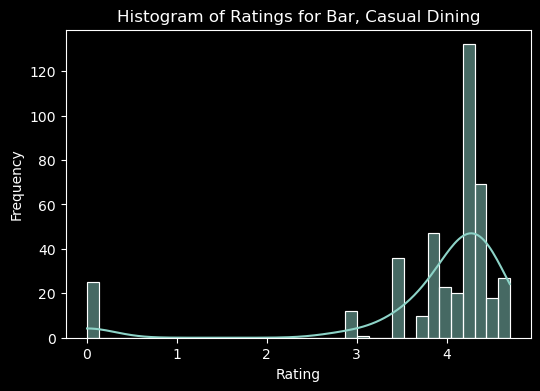

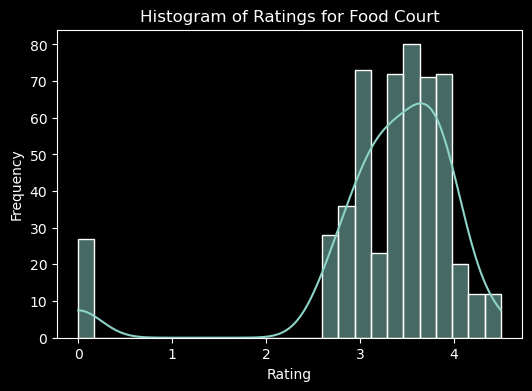

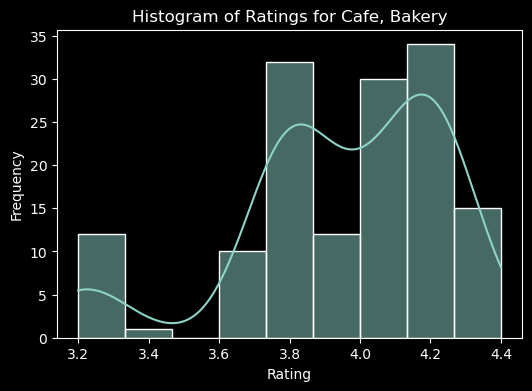

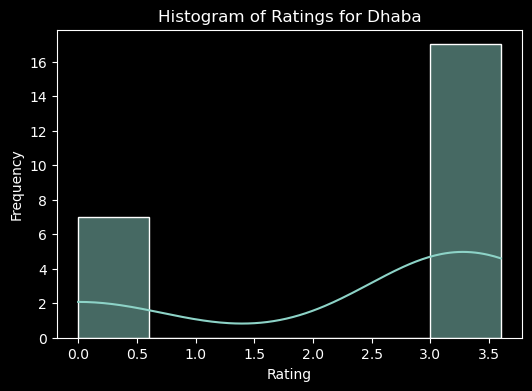

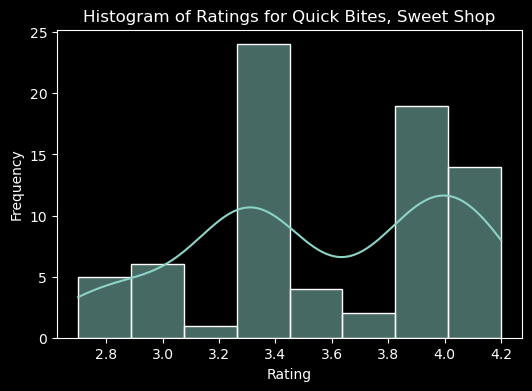

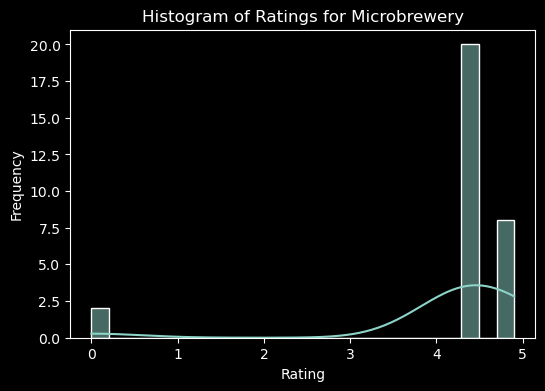

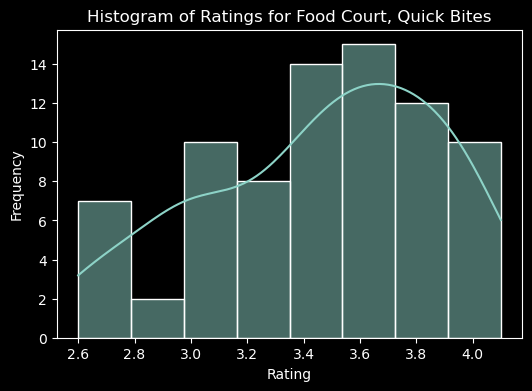

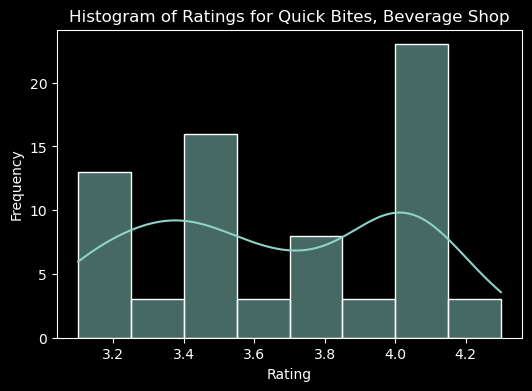

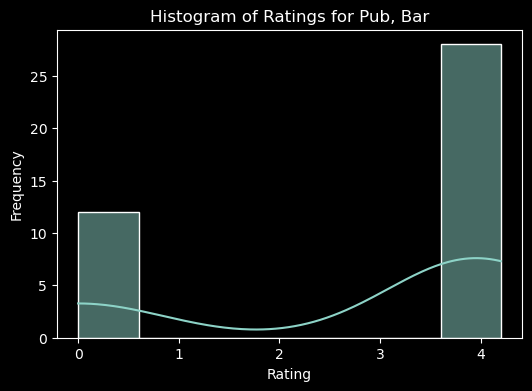

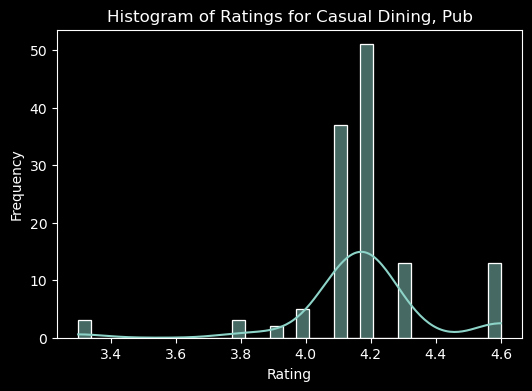

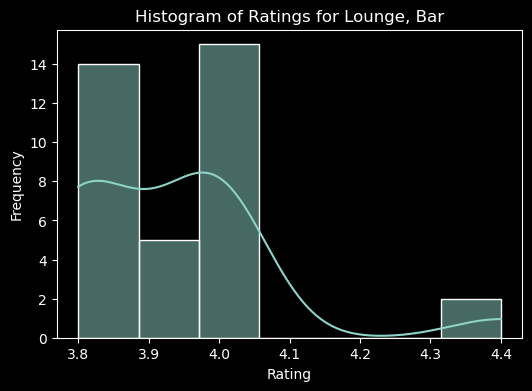

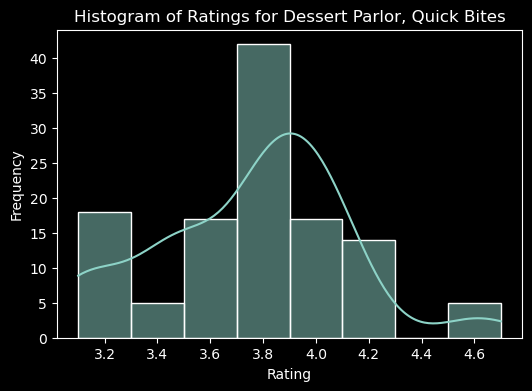

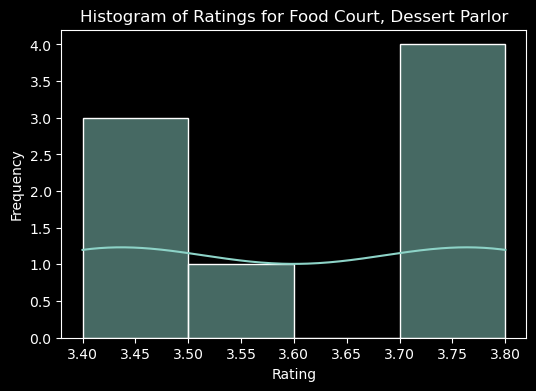

LinAlgError: singular matrix

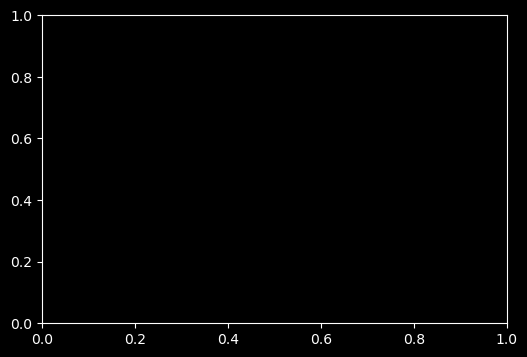

In [489]:
unique_rest_types = df['rest_type'].unique()

# Create separate plots for each unique restaurant type
for rest_type in unique_rest_types:
    filtered_data = df[df['rest_type'] == rest_type]['rate']
    
    if len(filtered_data) > 1:  # Check if there are sufficient data points
        plt.figure(figsize=(6, 4))
        sb.histplot(data=filtered_data, kde=True)
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of Ratings for {rest_type}')
        plt.show()

#### types of services

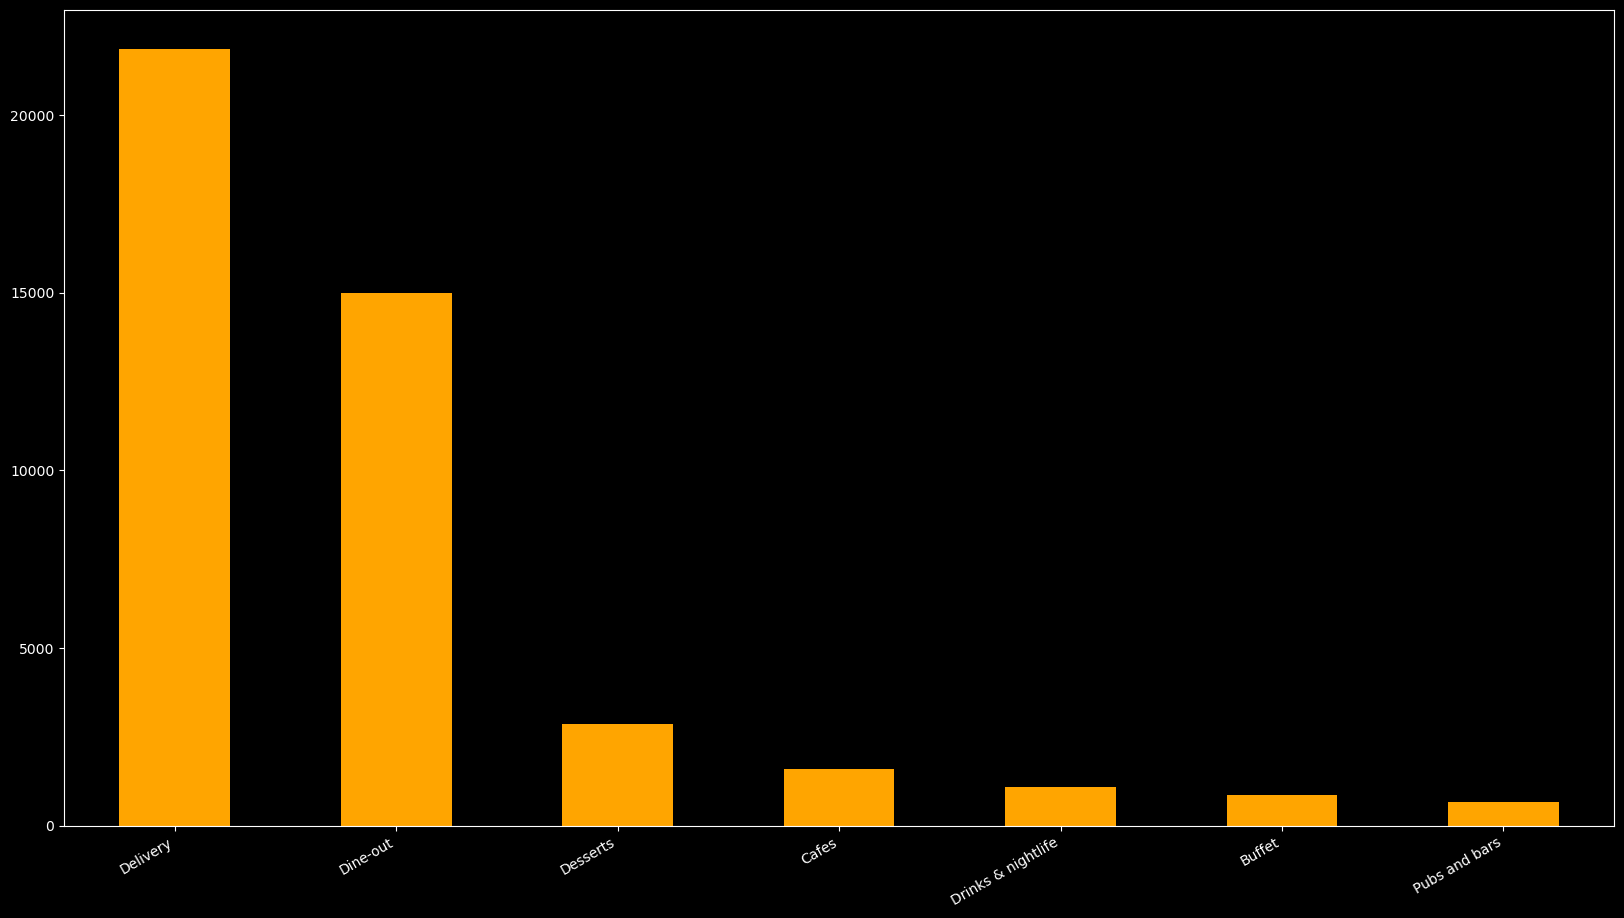

In [390]:
plt.figure(figsize=(20,12))
df['listed_in(type)'].value_counts().nlargest(20).plot.bar(color='orange')
plt.gcf().autofmt_xdate()


1)We can observe large no.of restaurants are providing delivery services.
2)Very minimal no.of pubs and bars in banglore

#### relation between service type and rating

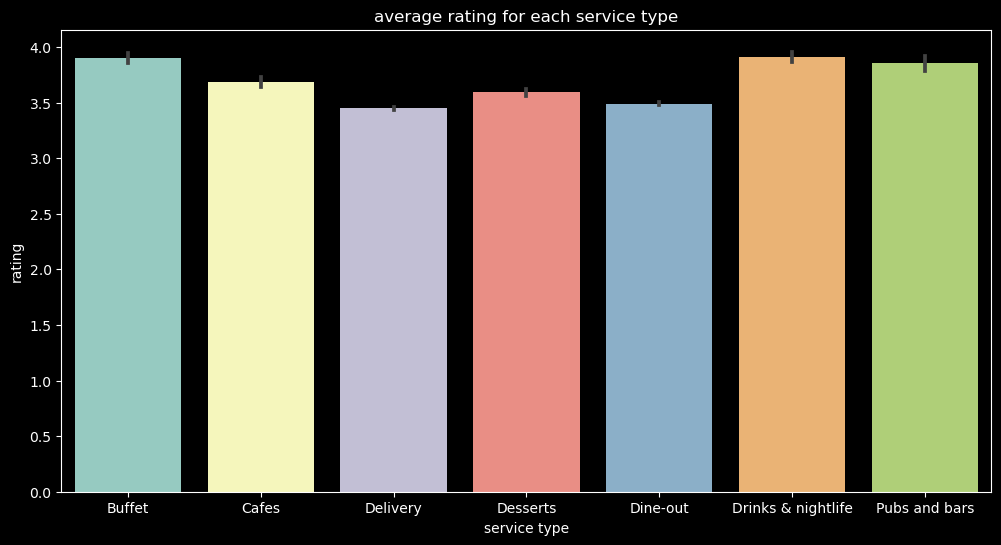

In [393]:
plt.figure(figsize=(12, 6))
sb.barplot(y="rate", x="listed_in(type)", data=df)
plt.xlabel("service type")
plt.ylabel("rating")
plt.title("average rating for each service type")
plt.show()

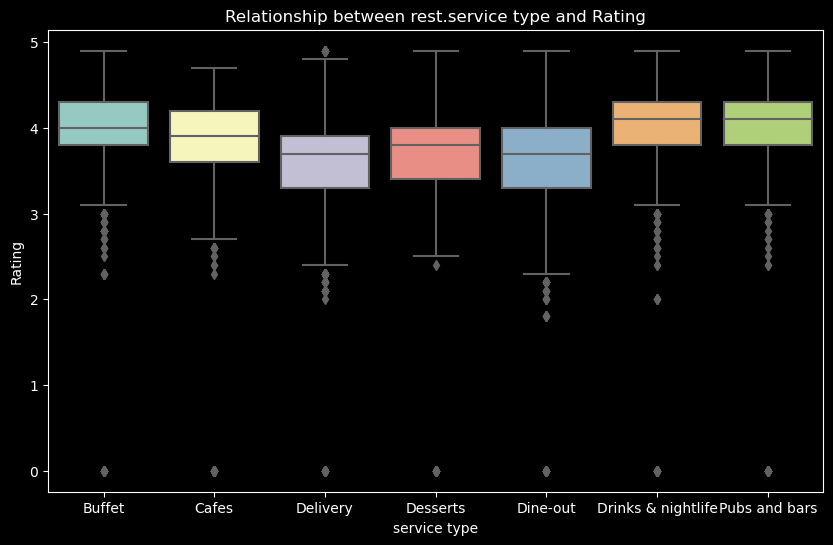

In [395]:
plt.figure(figsize=(10, 6))
sb.boxplot(x="listed_in(type)", y="rate", data=df)
plt.xlabel("service type")
plt.ylabel("Rating")
plt.title("Relationship between rest.service type and Rating")
plt.show()

1)we can observe buffet,drinks&nightlife and pubs and bars type of services are having relatively high no.of.ratings.
2)all types of services are having high no.of. rating between 3.2 to 4.5

#### cost of restaurant 

In [407]:
df["approx_cost(for two people)"].dtype

dtype('float64')

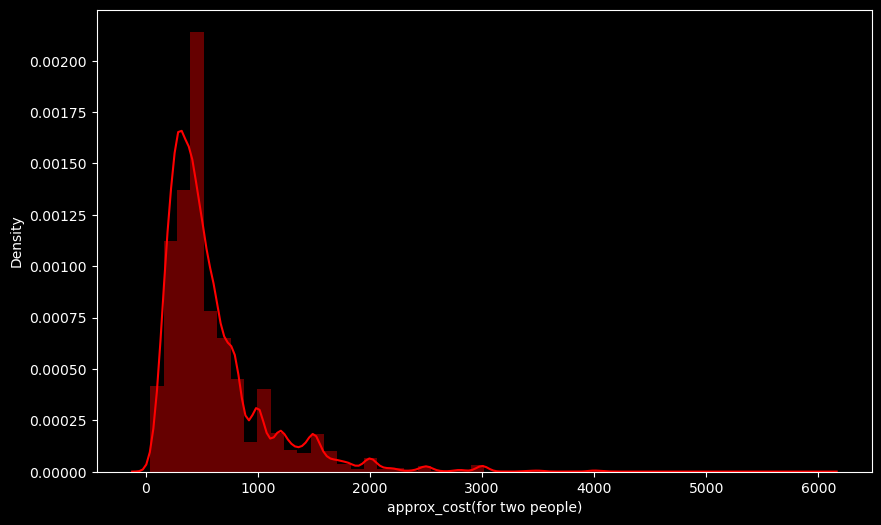

In [415]:
plt.figure(figsize=(10,6))
sb.distplot(df['approx_cost(for two people)'] ,color='red')
plt.show()

#### costliest restaurant in bangalore

Most restaurants are affordable since appro.cost lies within 1000 for two people. 
very few restrants are costly

In [57]:
df_1=df.copy()
output_df=df_1[df_1['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]


#### this restaurant is the very costly restaurant in banglore

#### the top 10 costly restuarants in banglore

<AxesSubplot:xlabel='name'>

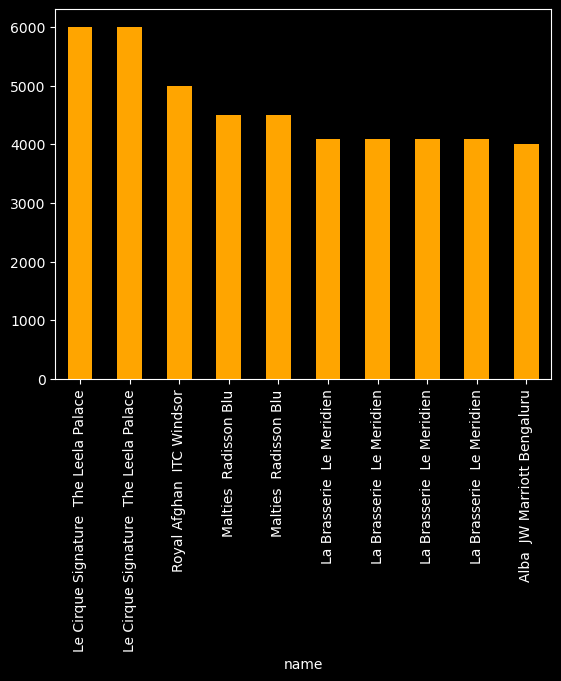

In [58]:
df_1.set_index('name',inplace=True)
df_1['approx_cost(for two people)'].nlargest(10).plot.bar(color='orange')


#### 10 cheapest restuarants in banglore

<AxesSubplot:xlabel='name'>

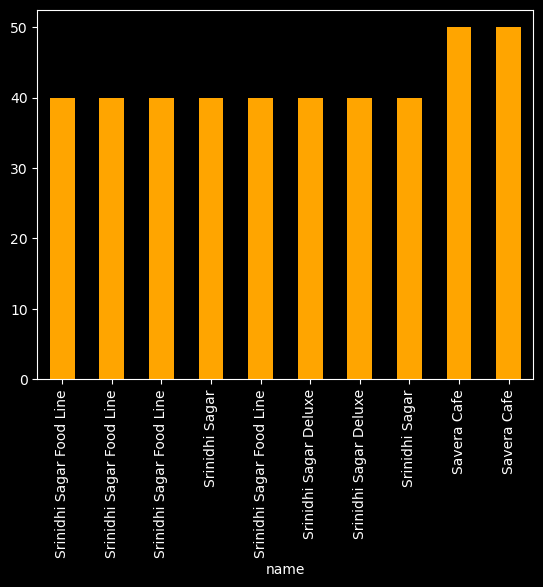

In [422]:
df_1['approx_cost(for two people)'].nsmallest(10).plot.bar(color='orange')

#### restaurants having good ratings and also cheap

In [59]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]

url  \
10     https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12     https://www.zomato.com/bangalore/the-coffee-sh...   
13     https://www.zomato.com/bangalore/caf-eleven-ba...   
34     https://www.zomato.com/bangalore/faasos-banash...   
39     https://www.zomato.com/bangalore/maruthi-davan...   
...                                                  ...   
51329  https://www.zomato.com/bangalore/pita-pit-whit...   
51334  https://www.zomato.com/bangalore/faasos-3-whit...   
51345  https://www.zomato.com/bangalore/the-wok-shop-...   
51376  https://www.zomato.com/bangalore/nu-tree-1-whi...   
51437  https://www.zomato.com/bangalore/captain-egg-w...   

                                                 address  \
10     12,29 Near PES University Back Gate, D'Souza N...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
13     111, Sapphire Toys Building, 100 Feet Ring Roa...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
39     556/A, Water Tank Road, 3rd Stage, Banashankar...   
...                                                  ...   
51329  Food Court, 4th Floor, Ascendas Park Square Ma...   
51334  First Floor, Apple City, Kadugodi Hoskote, Whi...   
51345  S 26, 2nd Floor, Phoenix Market City, Whitefie...   
51376  12th Floor, Gamma Building, Sigma Soft Tech Pa...   
51437  V R Bengaluru Mall, Mahadevapura Main Rd, Whit...   

                               name online_order book_table  rate  votes  \
10              Cafe Down The Alley          Yes         No   4.1    402   
12                 The Coffee Shack          Yes        Yes   4.2    164   
13                       CafeEleven           No         No   4.0    424   
34                           Faasos          Yes         No   4.2    415   
39     Maruthi Davangere Benne Dosa          Yes         No   4.0     17   
...                             ...          ...        ...   ...    ...   
51329                      Pita Pit          Yes         No   4.0     33   
51334                        Faasos          Yes         No   4.0    184   
51345                  The Wok Shop          Yes         No   4.2    221   
51376                        nutree          Yes         No   4.2     52   
51437                   Captain Egg           No         No   4.1     18   

                                phone      location    rest_type  \
10     080 26724489\r\n+91 7406048982  Banashankari         Cafe   
12                     +91 9731644212  Banashankari         Cafe   
13                       080 49577715  Banashankari         Cafe   
34                     +91 7700020020  Banashankari  Quick Bites   
39                     +91 9019563485  Banashankari  Quick Bites   
...                               ...           ...          ...   
51329                    080 49653067    Whitefield  Quick Bites   
51334                  +91 7700020020    Whitefield  Quick Bites   
51345                  +91 8067266088    Whitefield  Quick Bites   
51376                  +91 8310393035    Whitefield  Quick Bites   
51437  +91 7622934444\n+91 9909000096    Whitefield   Food Court   

                                              dish_liked  \
10     Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12     Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
13     Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
39                                                   NaN   
...                                                  ...   
51329                                                NaN   
51334  Rolls, Cheesy Chicken, Chocolava Cake, Paneer ...   
51345  Momos, Chocolate Bar, Fish, Sweet Potato Fries...   
51376  Palak Paneer, Idli, Aloo Paratha, Rajma Chawal...   
51437                                                NaN   

                                                cuisines  \
10                                                  Cafe   
12                   Cafe, Chinese, Cont

In [432]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [437]:
df.iloc[10,2]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [439]:
df.drop(index=10,inplace=True)

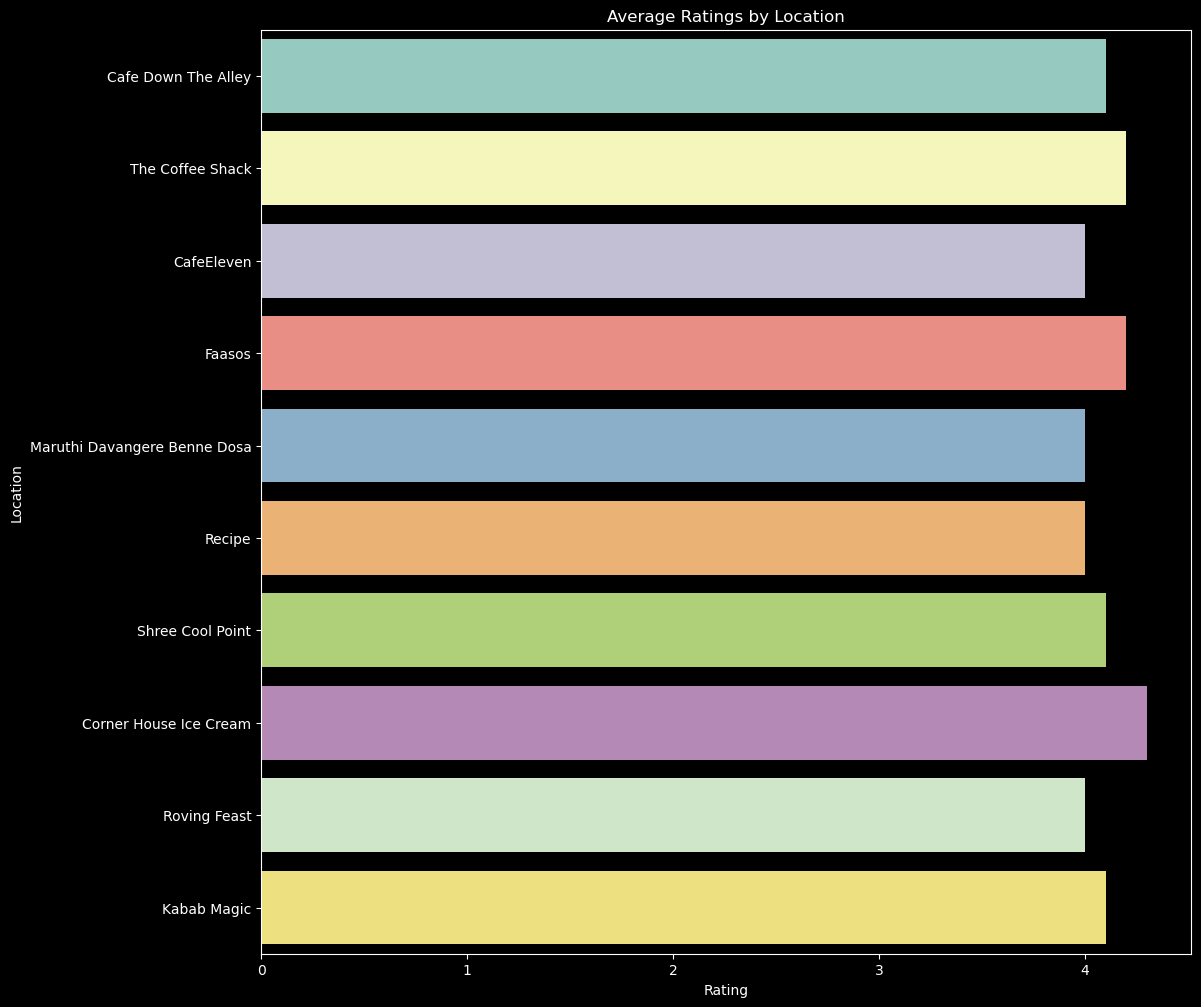

In [86]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].head(10)

plt.figure(figsize=(12, 12))
sb.barplot(x="rate", y="name", data=df_new)
plt.xlabel("Rating")
plt.ylabel("Location")
plt.title("Average Ratings by Location")
plt.show()

In [315]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new)

4028

there are 4028 restaurants which are cheap and also having good rating. So we can consider them

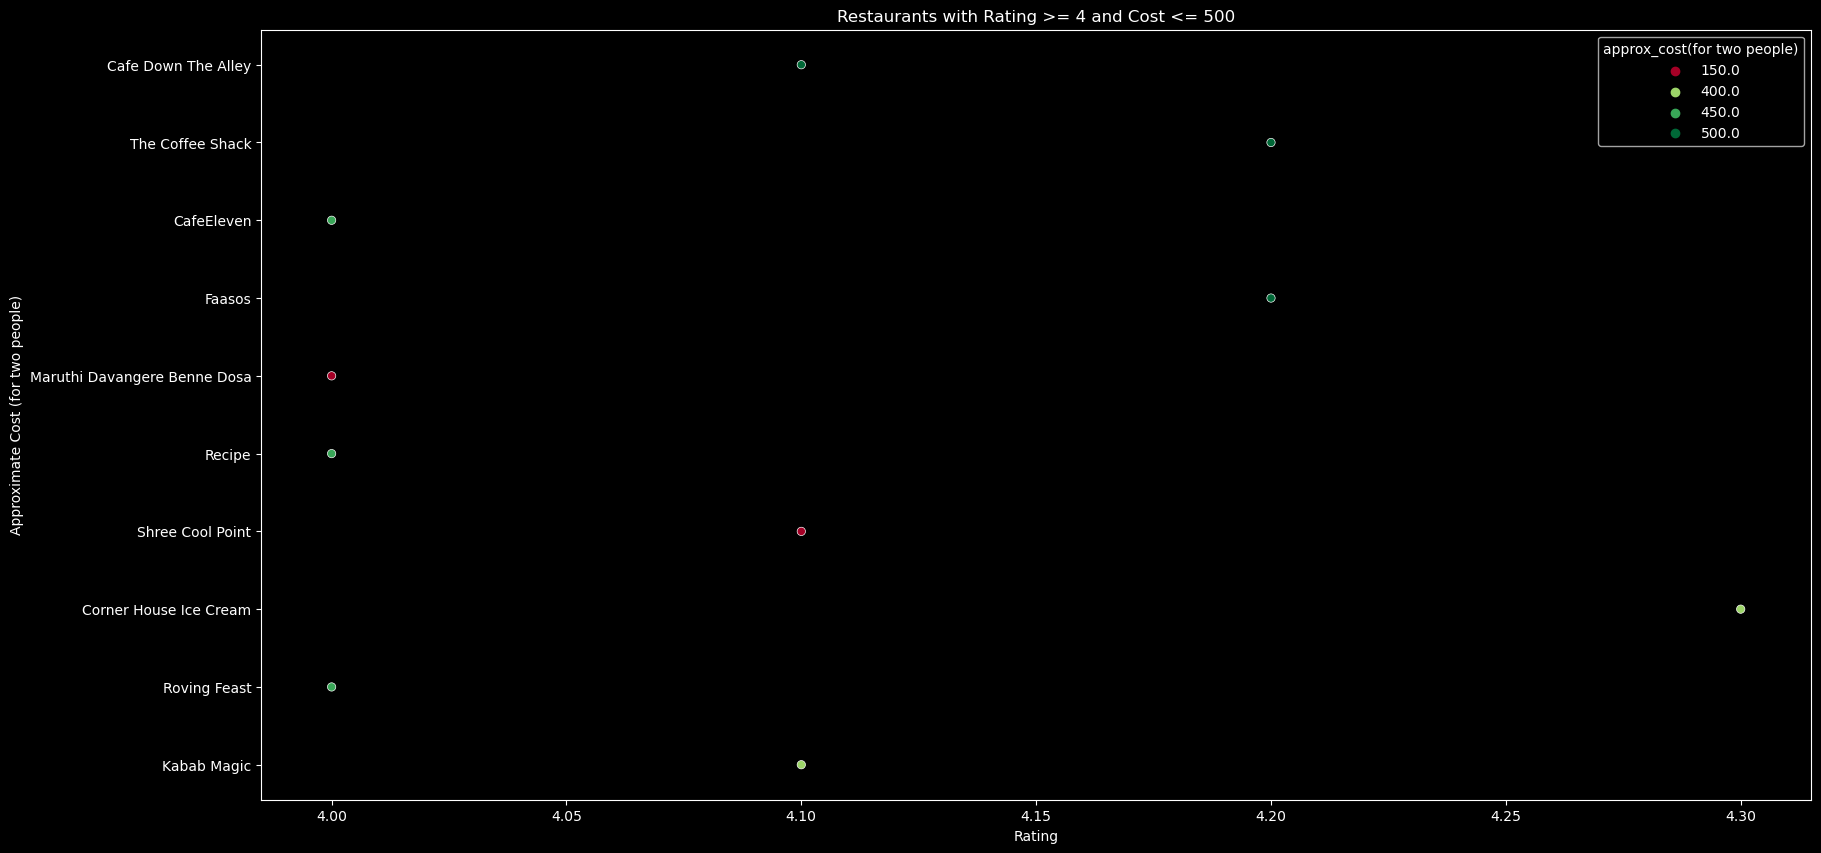

In [92]:
filtered_df = df[(df['rate'] >= 4) & (df['approx_cost(for two people)'] <= 500)].head(10)

plt.figure(figsize=(20, 10))
sb.scatterplot(x='rate',y="name", hue='approx_cost(for two people)', data=filtered_df,palette="RdYlGn")
plt.xlabel('Rating')
plt.ylabel('Approximate Cost (for two people)')
plt.title('Restaurants with Rating >= 4 and Cost <= 500')
plt.show()

In [6]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [ ]:
df['Rest_type'] = df['Rest_type'].str.replace('[^A-Za-z\s,]','').str.replace('Caf','Cafe')

#### number of restaurants in a location

In [62]:
df.groupby("location")["name"].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafee, Addh...
Banaswadi            [Cafee Nibras, The Sanctuary, Crunch Pizzas, P...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathjis Ca...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafee, Night Diaries, LocalHost, ABs ...
Wilson Garden        [Tree Top, Sahanas Nati Style, Karavali Kolima...
Yelahanka            [Prashanth Naati Corner, Chetas Kitchen, Twist...
Yeshwantpur          [Chefs Bank, New Agarwal Bhavan, Fishing Boat,...
Name: name, Length: 92, dtype: object

In [63]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [64]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').nlargest(20,columns="restaurant").style.background_gradient(cmap="plasma")

<AxesSubplot:xlabel='location'>

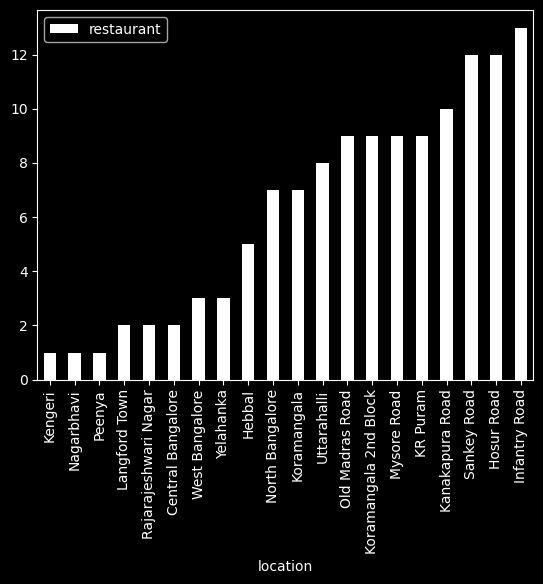

In [461]:
df_total.sort_values(by='restaurant').nsmallest(20,columns="restaurant").plot.bar(color="white")

#### most famous restaurants chains in bengaluru

In [473]:
df_u=df.groupby("name")["rate"].mean().sort_values(ascending=False).head(10)##since we want the famous restaurant chain we used ratings it got to decide its fame 

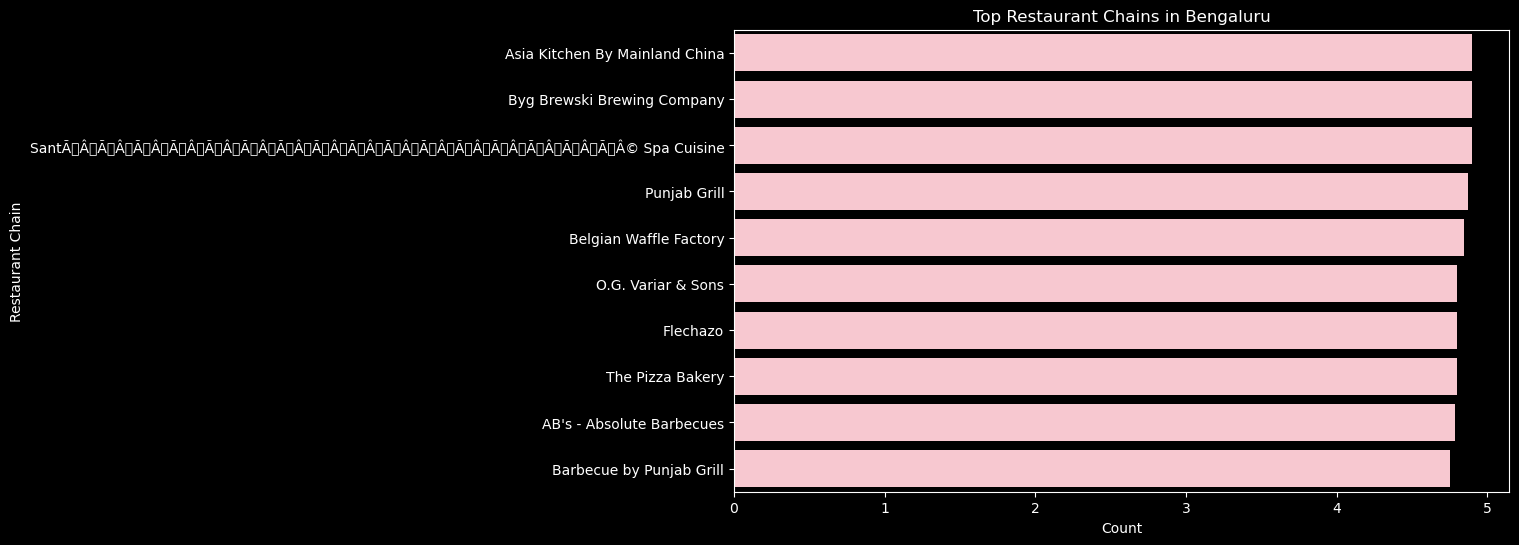

In [476]:
plt.figure(figsize=(10, 6))
sb.barplot(x=df_u, y=df_u.index, color='pink')
plt.xlabel('Count')
plt.ylabel('Restaurant Chain')
plt.title('Top Restaurant Chains in Bengaluru')
plt.show()

In [470]:
df["name"].value_counts()[0:10]##it gives top restaurant chain

Cafe Coffee Day      89
Onesta               85
Empire Restaurant    71
Kanti Sweets         68
Just Bake            68
Five Star Chicken    68
Petoo                64
Baskin Robbins       63
Pizza Hut            62
Polar Bear           61
Name: name, dtype: int64

#### which are the main areas for food

<AxesSubplot:xlabel='location'>

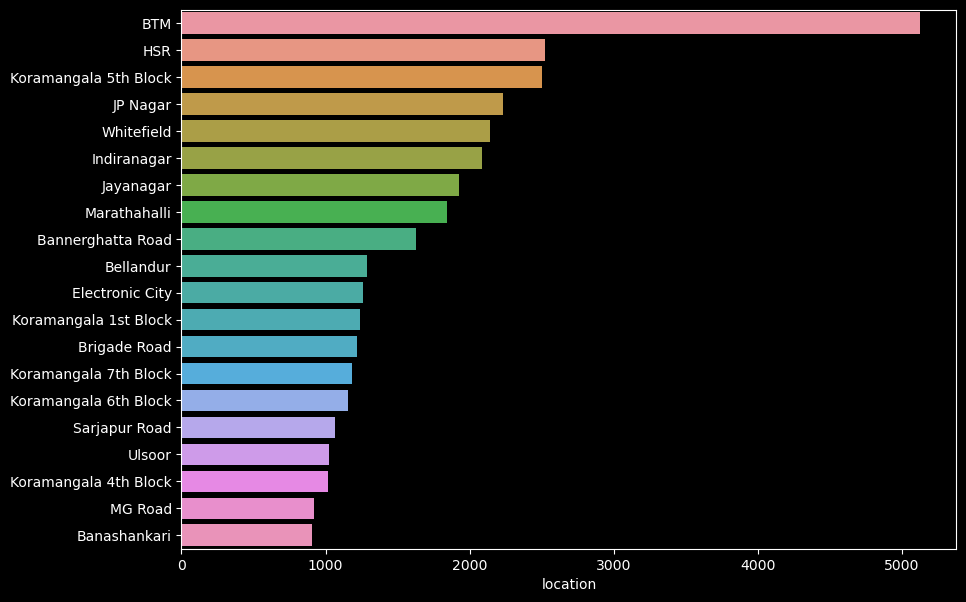

In [36]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sb.barplot(Restaurant_locations,Restaurant_locations.index)

here you can see BTM is the main area for food.

In [65]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [66]:
locations['new_Name']='Bangalore '+locations['Name']

In [67]:
locations.head()

Name                      new_Name
0        Banashankari        Bangalore Banashankari
1        Basavanagudi        Bangalore Basavanagudi
2         Mysore Road         Bangalore Mysore Road
3           Jayanagar           Bangalore Jayanagar
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout

#### geographical analysis

In [68]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [69]:
from geopy.geocoders import Nominatim

In [70]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [71]:
locations['geo_loc']=lat_lon

In [72]:
locations.head()

Name                      new_Name  \
0        Banashankari        Bangalore Banashankari   
1        Basavanagudi        Bangalore Basavanagudi   
2         Mysore Road         Bangalore Mysore Road   
3           Jayanagar           Bangalore Jayanagar   
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (12.9417261, 77.5755021)  
2          (12.9466619, 77.5300896)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [73]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [74]:
Rest_locations.columns=['Name','count']
Rest_locations.head().style.background_gradient(cmap="inferno")

In [75]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

In [23]:
type(Restaurant_locations['geo_loc'][0])

tuple

In [76]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [77]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.8625599, 77.5905874), (12.9390255, 77.6238477),
       (12.9364846, 77.6134783), (12.9699876, 77.6065344),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (15.67509025, 73.81083634836561), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (40.572423, -74.141107), (12.9417261, 77.5755021),
       (34.0730397, 74.8298871), (33.5935063, -79.0345627),
       (12.9986827, 77.615525), (40.7133715, -74.0091794),
       (13.0093455, 77.6377094), (13.0243476, 77.5720015),
       (13.0141618, 77.6518539), (40.7652844, -76.373824),
       (12.9882338, 77.554883), (3

In [78]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [79]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

Restaurant_locations.head().style.background_gradient(cmap="Wistia")

In [80]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [81]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()
basemap

In [82]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4261.0],
 [12.9348429, 77.6189768, 2381.0],
 [18.1475, 41.538889, 2128.0],
 [12.9732913, 77.6404672, 1936.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1718.0],
 [53.5533682, -2.2969019, 1693.0],
 [12.9552572, 77.6984163, 1503.0],
 [12.8625599, 77.5905874, 1324.0],
 [12.9390255, 77.6238477, 1111.0],
 [12.9364846, 77.6134783, 1089.0],
 [12.9699876, 77.6065344, 1084.0],
 [12.93103185, 77.6782471, 1078.0],
 [12.9277245, 77.6327822, 965.0],
 [15.67509025, 73.81083634836561, 964.0],
 [12.920441, 77.6653284, 919.0],
 [12.9778793, 77.6246697, 901.0],
 [12.9327778, 77.6294052, 864.0],
 [12.9755264, 77.6067902, 836.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 748.0],
 [13.0027353, 77.5703253, 658.0],
 [40.572423, -74.141107, 634.0],
 [12.9417261, 77.5755021, 628.0],
 [34.0730397, 74.8298871, 608.0],
 [33.5935063, -79.0345627, 581.0],
 [12.9986827, 77.615525, 578.0],
 [40.7133715, -74.0091794, 550.0],
 [13.0093455,

In [83]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [84]:
basemap

# preprocessing the model

In [540]:
df_new=df[df["rate"]!="NEW"]

In [541]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          43942 non-null  object 
 1   address                      43942 non-null  object 
 2   name                         43942 non-null  object 
 3   online_order                 43942 non-null  object 
 4   book_table                   43942 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        43942 non-null  int64  
 7   phone                        43110 non-null  object 
 8   location                     43942 non-null  object 
 9   rest_type                    43791 non-null  object 
 10  dish_liked                   23609 non-null  object 
 11  cuisines                     43931 non-null  object 
 12  approx_cost(for two people)  43842 non-null  float64
 13  reviews_list    

In [542]:
df_new.drop_duplicates(subset=["url","address","name"])

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                       San Churro Cafee          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712      Best Brews  Four Points by Sheraton Bengaluru           No   
51715  Chime  Sheraton Grand Bengaluru Whitefield Hotel            No   
51716                        The Nest  The Den Bengaluru           No   

      book_table  rate  votes                             phone  \
0            Yes   4.1    775    080 42297555\r\n+91 9743772233   
1             No   4.1    787                      080 41714161   
2             No   3.8    918                    +91 9663487993   
3             No   3.7     88                    +91 9620009302   
4             No   3.8    166  +91 8026612447\r\n+91 9901210005   
...          ...   ...    ...                               ...   
51709         No   3.7     34    +91 9980121279\n+91 9900240646   
51711         No   2.5     81                      080 65951222   
51712         No   3.6     27                      080 40301477   
51715        Yes   4.3    236                      080 49652769   
51716         No   3.4     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51709                  Whitefield   Casual Dining, Bar   
51711                  Whitefield   Casual Dining, Bar   
51712                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Cho

In [543]:
df_new.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [544]:
df_new.rename(columns={'approx_cost(for two people)': 'cost'}, inplace=True)

In [545]:
df_new.rename(columns={'listed_in(type)': 'type'}, inplace=True)

In [546]:
final=df_new.drop(["url","address","phone","listed_in(city)","votes","reviews_list"],axis=1)

In [547]:
final

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                       San Churro Cafee          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712      Best Brews  Four Points by Sheraton Bengaluru           No   
51715  Chime  Sheraton Grand Bengaluru Whitefield Hotel            No   
51716                        The Nest  The Den Bengaluru           No   

      book_table  rate                    location            rest_type  \
0            Yes   4.1                Banashankari        Casual Dining   
1             No   4.1                Banashankari        Casual Dining   
2             No   3.8                Banashankari  Cafe, Casual Dining   
3             No   3.7                Banashankari          Quick Bites   
4             No   3.8                Basavanagudi        Casual Dining   
...          ...   ...                         ...                  ...   
51709         No   3.7                  Whitefield   Casual Dining, Bar   
51711         No   2.5                  Whitefield   Casual Dining, Bar   
51712         No   3.6                  Whitefield                  Bar   
51715        Yes   4.3  ITPL Main Road, Whitefield                  Bar   
51716         No   3.4  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
51709                                                NaN   
51711                               Biryani, Andhra Meal   
51712                                                NaN   
51715                       Cocktails, Pizza, Buttermilk   
51716                                                NaN   

                                          cuisines    cost menu_item  \
0                   North Indian, Mughlai, Chinese   800.0        []   
1                      Chinese, North Indian, Thai   800.0        []   
2                           Cafe, Mexican, Italian   800.0        []   
3                       South Indian, North Indian   300.0        []   
4                         North Indian, Rajasthani   600.0        []   
...                                            ...     ...       ...   
51709                    North Indian, Continental   800.0        []   
51711  Andhra, South Indian, Chinese, North Indian   800.0        []   
51712                                  Continental  1500.0        []   
51715                                  Finger Food  2500.0        []   
51716       Finger Food, North Indian, Continental  1500.0        []   

                type  
0             Buffet  
1             Buffet  
2             Buffet  
3             Buffet  
4             Buffet  
...              ...  
51709  Pubs and bars  
51711  Pubs and bars  
51712  Pubs and bars  
51715  Pubs and bars  
51716  Pubs and bars  

[43942 rows x 11 columns]

In [548]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43942 non-null  object 
 1   online_order  43942 non-null  object 
 2   book_table    43942 non-null  object 
 3   rate          43942 non-null  float64
 4   location      43942 non-null  object 
 5   rest_type     43791 non-null  object 
 6   dish_liked    23609 non-null  object 
 7   cuisines      43931 non-null  object 
 8   cost          43842 non-null  float64
 9   menu_item     43942 non-null  object 
 10  type          43942 non-null  object 
dtypes: float64(2), object(9)
memory usage: 4.0+ MB


In [549]:
final["cost"]=final["cost"].fillna(final["cost"].mean())


In [550]:
#final["cuisines"]=final["cuisines"].fillna(final["cuisines"].mode())##it will not work since we pass series value directly
final["cuisines"] = final["cuisines"].fillna(final["cuisines"].mode().iloc[0])##here we are giving iloc to take the first mode value

In [551]:
final["rest_type"]=final["rest_type"].fillna(final["rest_type"].mode().iloc[0])

In [552]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43942 non-null  object 
 1   online_order  43942 non-null  object 
 2   book_table    43942 non-null  object 
 3   rate          43942 non-null  float64
 4   location      43942 non-null  object 
 5   rest_type     43942 non-null  object 
 6   dish_liked    23609 non-null  object 
 7   cuisines      43942 non-null  object 
 8   cost          43942 non-null  float64
 9   menu_item     43942 non-null  object 
 10  type          43942 non-null  object 
dtypes: float64(2), object(9)
memory usage: 4.0+ MB


In [553]:
final["dish_liked"].value_counts()

Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Burgers, Chicken Fries, Hot Wings                                                                      1
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri 

In [554]:
final["dish_liked"].fillna("Biriyani", inplace=True)

In [555]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43942 non-null  object 
 1   online_order  43942 non-null  object 
 2   book_table    43942 non-null  object 
 3   rate          43942 non-null  float64
 4   location      43942 non-null  object 
 5   rest_type     43942 non-null  object 
 6   dish_liked    43942 non-null  object 
 7   cuisines      43942 non-null  object 
 8   cost          43942 non-null  float64
 9   menu_item     43942 non-null  object 
 10  type          43942 non-null  object 
dtypes: float64(2), object(9)
memory usage: 4.0+ MB


In [556]:
final["rate"]=final["rate"].apply(lambda x: 1 if x>3.5 else 0)
#CHANGE THE RATING COLUMN. SO THE PREDICTION WILL BE WHETHER THE RESTAUANT IS GOOD(1) OR BAD(0)

In [557]:
final.sample(3)

name online_order book_table  rate         location  \
13887         Adya Hotel           No         No     0  Electronic City   
15972  The Punjabi Rasoi           No         No     1              HSR   
22095       Lassi Darbar          Yes         No     1              BTM   

           rest_type                                         dish_liked  \
13887    Quick Bites                                           Biriyani   
15972  Casual Dining  Mango Lassi, Tomato Soup, Egg Curry, Chana Mas...   
22095  Beverage Shop                                           Biriyani   

                                  cuisines   cost  \
13887  South Indian, North Indian, Chinese  400.0   
15972                         North Indian  800.0   
22095         Ice Cream, Juices, Beverages  200.0   

                                               menu_item      type  
13887                                                 []  Delivery  
15972                                                 []  Delivery  
22095  ['Dry Fruit Lassi', 'Strawberry Lassi', 'Kesar...  Delivery

<AxesSubplot:>

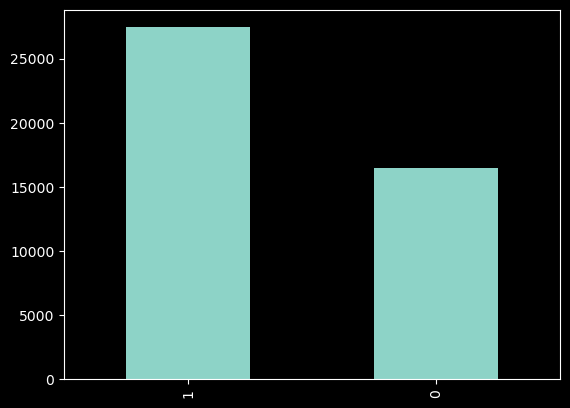

In [558]:
final["rate"].value_counts().plot.bar()##to check whether it is balanced or not

In [559]:
final["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [560]:
final["online_order"]=final["online_order"].map({"Yes":1,"No":0})

In [561]:
final["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [562]:
y_train

17148    1
3044     1
21375    1
15448    1
35539    1
        ..
18901    1
24386    0
3913     0
7143     0
37735    1
Name: rate, Length: 35153, dtype: int64

In [563]:
final["book_table"]=final["book_table"].map({"Yes":1,"No":0})

In [564]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43942 non-null  object 
 1   online_order  43942 non-null  int64  
 2   book_table    43942 non-null  int64  
 3   rate          43942 non-null  int64  
 4   location      43942 non-null  object 
 5   rest_type     43942 non-null  object 
 6   dish_liked    43942 non-null  object 
 7   cuisines      43942 non-null  object 
 8   cost          43942 non-null  float64
 9   menu_item     43942 non-null  object 
 10  type          43942 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 4.0+ MB


# training the model

In [565]:
x=final.drop(["rate"],axis=1)
y=final["rate"]

In [566]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [567]:
import category_encoders as ce
encode=ce.BinaryEncoder(cols=["location", "cuisines", "menu_item","dish_liked","rest_type","type","name"],return_df=True)
x_train=encode.fit_transform(x_train)
x_test=encode.transform(x_test)

In [568]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)


RandomForestClassifier()

In [569]:
y_pred=model.predict(x_test)

In [570]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7978457110876598

In [572]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9520594705302283


In [571]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()
et_model.fit(x_train,y_train)

y_predict = et_model.predict(x_test)
r2_score(y_test,y_predict)

0.809680693191705

In [574]:


accuracy1 = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy1)

Accuracy: 0.9548661154517181
